***Project: 다음 분기에 어떤 게임을 설계해야 할까???***

*   *장르별 판매량의 추이를 확인하여 해당 장르의 게임을 개발?*
*   *플랫폼별 판매량의 추이를 확인하여 해당 플랫폼의 게임을 개발?*
*   *지역별 판매량의 추이를 확인하여 해당 지역 취향에 맞는 게임을 개발?*
*   *기타 등등*

*1. 필요한 Library import*



In [1]:
# import Library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

*2. Load Dataset*

In [2]:
# load Dataset
url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
df = pd.read_csv(url, index_col=0)

*3. 기본적인 Data 확인, 결측치 제거 등*

In [3]:
df.head(15)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [4]:
df[(df.Year.isna()) | (df.Year < 100) | (df.Genre.isna())]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
32,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
51,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
75,Age of Empires III: Complete Collection,PC,9.0,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
82,Treasures of the Deep,PS,97.0,Action,Namco Bandai Games,0.1,0.07,0,0.01
110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
...,...,...,...,...,...,...,...,...,...
16432,Cars: Mater-National Championship,X360,2007.0,NaN,THQ,0.13,0,0,0.01
16433,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01
16483,Super Robot Taisen F Kanketsuhen,SAT,98.0,Strategy,Banpresto,0M,0,0.55,0
16556,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0,0.03,0,0.01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [6]:
df.Year[df.Year < 100]

75        9.0
82       97.0
214      11.0
305      15.0
769       3.0
         ... 
15986    94.0
16104     8.0
16150     8.0
16395     0.0
16483    98.0
Name: Year, Length: 100, dtype: float64

*Data 결측치 확인 및 추후 계산을 위하여 XXX_Sales 값을 float로 변환*
*'M', 'K' 등 단위도 같이 변환

In [7]:
# Remove 'M', 'K' and change type (object -> float)
def clean_sales(org):
	kilo = 0.001

	if(org.endswith('M')):
		new = float(np.round(float(org.replace('M', '')), 2))
	elif(org.endswith('K')):
		new = float(np.round(float(org.replace('K', '')) * kilo, 2))
	else:
		new = float(np.round(float(org), 2))

	return new

In [8]:
df.NA_Sales = df.NA_Sales.apply(clean_sales)
df.EU_Sales = df.EU_Sales.apply(clean_sales)
df.JP_Sales = df.JP_Sales.apply(clean_sales)
df.Other_Sales = df.Other_Sales.apply(clean_sales)

*중복 데이터 확인 및 삭제*

*Name은 같지만, Platform이 다른 데이터는 중복처리하지 않는다.*

In [9]:
df[df.Name.duplicated(keep=False)].sort_values('Name').head(8)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
5505,007: Quantum of Solace,Wii,2008.0,Action,Activision,0.30,0.29,0.01,0.07
9466,007: Quantum of Solace,DS,2008.0,Action,Activision,0.11,0.01,0.00,0.01
2661,007: Quantum of Solace,PS2,2008.0,Action,Activision,0.17,0.00,0.00,0.26
16281,007: Quantum of Solace,X360,2008.0,Action,Activision,0.82,0.52,0.01,0.14
6840,007: Quantum of Solace,PS3,2008.0,Action,Activision,0.43,0.52,0.02,0.20
8868,007: Quantum of Solace,PC,2008.0,Action,Activision,0.01,0.01,0.00,0.00
2504,007: The World is not Enough,N64,2000.0,Action,Electronic Arts,1.13,0.38,0.02,0.03
4504,007: The World is not Enough,PS,2000.0,Action,Electronic Arts,0.51,0.35,0.00,0.06


In [10]:
df[df.duplicated(keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8056,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0
9185,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0


In [11]:
df.drop_duplicates(inplace=True)

*Data 결측치 확인*

In [12]:
df.isna().sum()

Name             0
Platform         0
Year           270
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [13]:
# df[df.Year.isna()].sum() : FutureWarning ........
cond = df.Year.isna()
df.NA_Sales[cond].sum(), df.EU_Sales[cond].sum(), df.JP_Sales[cond].sum(), df.Other_Sales[cond].sum()

(59.519999999999996, 25.01, 6.7, 8.739999999999998)

In [14]:
print("NA_Sales 결측치 합: " + str(df.NA_Sales[cond].sum()))
print("EU_Sales 결측치 합: " + str(df.EU_Sales[cond].sum()))
print("JP_Sales 결측치 합: " + str(df.JP_Sales[cond].sum()))
print("Other_Sales 결측치 합: " + str(df.Other_Sales[cond].sum()))

NA_Sales 결측치 합: 59.519999999999996
EU_Sales 결측치 합: 25.01
JP_Sales 결측치 합: 6.7
Other_Sales 결측치 합: 8.739999999999998


In [15]:
cond = df.Genre.isna()
print("NA_Sales 결측치 합: " + str(df.NA_Sales[cond].sum()))
print("EU_Sales 결측치 합: " + str(df.EU_Sales[cond].sum()))
print("JP_Sales 결측치 합: " + str(df.JP_Sales[cond].sum()))
print("Other_Sales 결측치 합: " + str(df.Other_Sales[cond].sum()))

NA_Sales 결측치 합: 20.61
EU_Sales 결측치 합: 13.119999999999997
JP_Sales 결측치 합: 12.879999999999999
Other_Sales 결측치 합: 5.539999999999999


In [16]:
print("NA_Sales 합: " + str(df.NA_Sales.sum()))
print("EU_Sales 합: " + str(df.EU_Sales.sum()))
print("JP_Sales 합: " + str(df.JP_Sales.sum()))
print("Other_Sales 합: " + str(df.Other_Sales.sum()))

NA_Sales 합: 4392.95
EU_Sales 합: 2434.1299999999997
JP_Sales 합: 1290.9999999999998
Other_Sales 합: 797.7500000000001


In [17]:
df.NA_Sales.sum(), df.EU_Sales.sum(), df.JP_Sales.sum(), df.Other_Sales.sum()

(4392.95, 2434.1299999999997, 1290.9999999999998, 797.7500000000001)

*위 확인 결과, 'Year' 정보가 없더라도 데이터를 삭제 할 수 없을만큼 출시량이 크다*


In [18]:
df[df.Year.isna()].count()

Name           270
Platform       270
Year             0
Genre          270
Publisher      248
NA_Sales       270
EU_Sales       270
JP_Sales       270
Other_Sales    270
dtype: int64

*'Year' 정보가 없는 데이터의 수가 270개이고, 해당 데이터의 출시량이 무시할 수 없으므로 결측치를 채워주자*


*아직 Web crawling을 안 배웠으니, 구글링을 해서 수동으로? *

In [19]:
# df.Year[df.Name == 'Rock Band'] = 2007 : SettingWithCopyWarning: ......

df_copy = df.copy()

df_copy.loc[df_copy[df_copy['Name'] == 'Action Man-Operation Extreme'].index, 'Year'] = 2000
df_copy.loc[df_copy[df_copy['Name'] == 'Advance Wars: Days of Ruin'].index, 'Year'] = 2008
df_copy.loc[df_copy[df_copy['Name'] == 'Adventure'].index, 'Year'] = 1980
df_copy.loc[df_copy[df_copy['Name'] == 'Agarest Senki: Re-appearance'].index, 'Year'] = 2008
df_copy.loc[df_copy[df_copy['Name'] == 'Air-Sea Battle'].index, 'Year'] = 1977
df_copy.loc[df_copy[df_copy['Name'] == 'AKB1/48: Idol to Guam de Koishitara...'].index, 'Year'] = 2011
df_copy.loc[df_copy[df_copy['Name'] == 'Alex Rider: Stormbreaker'].index, 'Year'] = 2006
df_copy.loc[df_copy[df_copy['Name'] == 'All-Star Baseball 2005'].index, 'Year'] = 2004
df_copy.loc[df_copy[df_copy['Name'] == 'Alone in the Dark: The New Nightmare'].index, 'Year'] = 2001
df_copy.loc[df_copy[df_copy['Name'] == 'Aquaman: Battle for Atlantis'].index, 'Year'] = 2003
df_copy.loc[df_copy[df_copy['Name'] == 'Atsumare! Power Pro Kun no DS Koushien'].index, 'Year'] = 2006
df_copy.loc[df_copy[df_copy['Name'] == 'B.L.U.E.: Legend of Water'].index, 'Year'] = 1998
df_copy.loc[df_copy[df_copy['Name'] == 'Backbreaker'].index, 'Year'] = 2009
df_copy.loc[df_copy[df_copy['Name'] == 'Battle vs. Chess'].index, 'Year'] = 2011
df_copy.loc[df_copy[df_copy['Name'] == 'Bejeweled 3'].index, 'Year'] = 2010
df_copy.loc[df_copy[df_copy['Name'] == 'Beyond the Labyrinth'].index, 'Year'] = 2012
df_copy.loc[df_copy[df_copy['Name'] == 'Big Beach Sports 2'].index, 'Year'] = 2010
df_copy.loc[df_copy[df_copy['Name'] == 'Bikkuriman Daijiten'].index, 'Year'] = 2007
df_copy.loc[df_copy[df_copy['Name'] == 'BioShock 2'].index, 'Year'] = 2010
df_copy.loc[df_copy[df_copy['Name'] == 'Breakaway IV'].index, 'Year'] = 1978
df_copy.loc[df_copy[df_copy['Name'] == 'Brothers in Arms: Furious 4'].index, 'Year'] = 2015
df_copy.loc[df_copy[df_copy['Name'] == 'Build-A-Bear Workshop: Friendship Valley'].index, 'Year'] = 2010
df_copy.loc[df_copy[df_copy['Name'] == 'Cabela\'s Alaskan Adventure'].index, 'Year'] = 2006
df_copy.loc[df_copy[df_copy['Name'] == 'Call of Duty 3'].index, 'Year'] = 2006
df_copy.loc[df_copy[df_copy['Name'] == 'Call of Duty: Black Ops'].index, 'Year'] = 2010
df_copy.loc[df_copy[df_copy['Name'] == 'Captain America: Super Soldier'].index, 'Year'] = 2011
df_copy.loc[df_copy[df_copy['Name'] == 'Charm Girls Club: My Fashion Mall'].index, 'Year'] = 2009
df_copy.loc[df_copy[df_copy['Name'] == 'Charm Girls Club: My Fashion Show'].index, 'Year'] = 2009
df_copy.loc[df_copy[df_copy['Name'] == 'Chou Soujuu Mecha MG'].index, 'Year'] = 2006
df_copy.loc[df_copy[df_copy['Name'] == 'Circus Atari'].index, 'Year'] = 1980
df_copy.loc[df_copy[df_copy['Name'] == 'Clockwork Empires'].index, 'Year'] = 2011
df_copy.loc[df_copy[df_copy['Name'] == 'College Hoops 2K6'].index, 'Year'] = 2005
df_copy.loc[df_copy[df_copy['Name'] == 'Combat'].index, 'Year'] = 1977
df_copy.loc[df_copy[df_copy['Name'] == 'Combat Elite: WWII Paratroopers'].index, 'Year'] = 2005
df_copy.loc[df_copy[df_copy['Name'] == 'Combat Wings: The Great Battles of WWII'].index, 'Year'] = 2012
df_copy.loc[df_copy[df_copy['Name'] == 'Cubix Robots for Everyone: Clash \'n\' Bash'].index, 'Year'] = 2002
df_copy.loc[df_copy[df_copy['Name'] == 'Custom Robo'].index, 'Year'] = 1999
df_copy.loc[df_copy[df_copy['Name'] == 'Dance! It\'s Your Stage'].index, 'Year'] = 2011
df_copy.loc[df_copy[df_copy['Name'] == 'DanceDanceRevolution II'].index, 'Year'] = 2011
df_copy.loc[df_copy[df_copy['Name'] == 'Danganronpa: Trigger Happy Havoc'].index, 'Year'] = 2010
df_copy.loc[df_copy[df_copy['Name'] == 'Dead Island: Riptide'].index, 'Year'] = 2013
df_copy.loc[df_copy[df_copy['Name'] == 'Dead Space 3'].index, 'Year'] = 2013
df_copy.loc[df_copy[df_copy['Name'] == 'Def Jam: Fight for NY'].index, 'Year'] = 2004
df_copy.loc[df_copy[df_copy['Name'] == 'Demon Chaos'].index, 'Year'] = 2005
df_copy.loc[df_copy[df_copy['Name'] == 'Dinotopia: The Sunstone Odyssey'].index, 'Year'] = 2003
df_copy.loc[df_copy[df_copy['Name'] == 'Disgaea 3: Absence of Detention'].index, 'Year'] = 2008
df_copy.loc[df_copy[df_copy['Name'] == 'Disney\'s Chicken Little: Ace In Action'].index, 'Year'] = 2006
df_copy.loc[df_copy[df_copy['Name'] == 'Disney\'s Cinderella: Magical Dreams'].index, 'Year'] = 2005
df_copy.loc[df_copy[df_copy['Name'] == 'Donkey Kong Land III'].index, 'Year'] = 1997
df_copy.loc[df_copy[df_copy['Name'] == 'Dragon Ball Z: Budokai Tenkaichi 2 (JP sales)'].index, 'Year'] = 2006
df_copy.loc[df_copy[df_copy['Name'] == 'Dragster'].index, 'Year'] = 1980
df_copy.loc[df_copy[df_copy['Name'] == 'Drake of the 99 Dragons'].index, 'Year'] = 2018
df_copy.loc[df_copy[df_copy['Name'] == 'Dream Dancer'].index, 'Year'] = 2009
df_copy.loc[df_copy[df_copy['Name'] == 'Dream Trigger 3D'].index, 'Year'] = 2011
df_copy.loc[df_copy[df_copy['Name'] == 'Drill Dozer'].index, 'Year'] = 2005

In [20]:
df_copy.loc[df_copy[df_copy['Name'] == 'Egg Monster Hero'].index, 'Year'] = 2005
df_copy.loc[df_copy[df_copy['Name'] == 'eJay Clubworld'].index, 'Year'] = 2003
df_copy.loc[df_copy[df_copy['Name'] == 'Face Racers: Photo Finish'].index, 'Year'] = 2011
df_copy.loc[df_copy[df_copy['Name'] == 'Famista 64'].index, 'Year'] = 1997
df_copy.loc[df_copy[df_copy['Name'] == 'Ferrari: The Race Experience'].index, 'Year'] = 2010
df_copy.loc[df_copy[df_copy['Name'] == 'FIFA Soccer 2004'].index, 'Year'] = 2003
df_copy.loc[df_copy[df_copy['Name'] == 'Final Fantasy XI'].index, 'Year'] = 2002
df_copy.loc[df_copy[df_copy['Name'] == 'Fishing Derby'].index, 'Year'] = 1980
df_copy.loc[df_copy[df_copy['Name'] == 'Flag Capture'].index, 'Year'] = 1978
df_copy.loc[df_copy[df_copy['Name'] == 'Flip\'s Twisted World'].index, 'Year'] = 2010
df_copy.loc[df_copy[df_copy['Name'] == 'Football Manager 2007'].index, 'Year'] = 2006
df_copy.loc[df_copy[df_copy['Name'] == 'Freaky Flyers'].index, 'Year'] = 2003
df_copy.loc[df_copy[df_copy['Name'] == 'Frogger\'s Adventures: Temple of the Frog'].index, 'Year'] = 2001
df_copy.loc[df_copy[df_copy['Name'] == 'Fullmetal Alchemist: Brotherhood'].index, 'Year'] = 2010
df_copy.loc[df_copy[df_copy['Name'] == 'Get Fit with Mel B'].index, 'Year'] = 2010
df_copy.loc[df_copy[df_copy['Name'] == 'Ghostbusters II'].index, 'Year'] = 1990
df_copy.loc[df_copy[df_copy['Name'] == 'GiFTPiA'].index, 'Year'] = 2003
df_copy.loc[df_copy[df_copy['Name'] == 'Godzilla: Destroy All Monsters Melee'].index, 'Year'] = 2002
df_copy.loc[df_copy[df_copy['Name'] == 'GRID'].index, 'Year'] = 2008
df_copy.loc[df_copy[df_copy['Name'] == 'Gun'].index, 'Year'] = 2005
df_copy.loc[df_copy[df_copy['Name'] == 'Hakuouki: Shinsengumi Kitan'].index, 'Year'] = 2014
df_copy.loc[df_copy[df_copy['Name'] == 'Half-Minute Hero 2'].index, 'Year'] = 2011
df_copy.loc[df_copy[df_copy['Name'] == 'Hangman'].index, 'Year'] = 1978
df_copy.loc[df_copy[df_copy['Name'] == 'Happy Feet Two'].index, 'Year'] = 2011
df_copy.loc[df_copy[df_copy['Name'] == 'Harvest Moon: Save the Homeland'].index, 'Year'] = 2001
df_copy.loc[df_copy[df_copy['Name'] == 'Harvest Moon: The Tale of Two Towns'].index, 'Year'] = 2010
df_copy.loc[df_copy[df_copy['Name'] == 'Haven: Call of the King'].index, 'Year'] = 2002
df_copy.loc[df_copy[df_copy['Name'] == 'Hitman 2: Silent Assassin'].index, 'Year'] = 2002
df_copy.loc[df_copy[df_copy['Name'] == 'Home Run'].index, 'Year'] = 1978
df_copy.loc[df_copy[df_copy['Name'] == 'Homeworld Remastered Collection'].index, 'Year'] = 2015
df_copy.loc[df_copy[df_copy['Name'] == 'Housekeeping'].index, 'Year'] = 2006
df_copy.loc[df_copy[df_copy['Name'] == 'Indy 500'].index, 'Year'] = 1977
df_copy.loc[df_copy[df_copy['Name'] == 'Inversion'].index, 'Year'] = 2012
df_copy.loc[df_copy[df_copy['Name'] == 'James Cameron\'s Dark Angel'].index, 'Year'] = 2002
df_copy.loc[df_copy[df_copy['Name'] == 'Jet Impulse'].index, 'Year'] = 2007
df_copy.loc[df_copy[df_copy['Name'] == 'Jet X20'].index, 'Year'] = 2002
df_copy.loc[df_copy[df_copy['Name'] == 'Jewel Link Chronicles: Mountains of Madness'].index, 'Year'] = 2012
df_copy.loc[df_copy[df_copy['Name'] == 'Jonah Lomu Rugby Challenge'].index, 'Year'] = 2011
df_copy.loc[df_copy[df_copy['Name'] == 'Jurassic Park: The Game'].index, 'Year'] = 2011
df_copy.loc[df_copy[df_copy['Name'] == 'Karate'].index, 'Year'] = 1982
df_copy.loc[df_copy[df_copy['Name'] == 'Legacy of Kain: Soul Reaver'].index, 'Year'] = 1999
df_copy.loc[df_copy[df_copy['Name'] == 'Legacy of Ys: Books I & II'].index, 'Year'] = 2009
df_copy.loc[df_copy[df_copy['Name'] == 'LEGO Batman: The Videogame'].index, 'Year'] = 2008
df_copy.loc[df_copy[df_copy['Name'] == 'LEGO Harry Potter: Years 5-7'].index, 'Year'] = 2011
df_copy.loc[df_copy[df_copy['Name'] == 'LEGO Indiana Jones: The Original Adventures'].index, 'Year'] = 2008
df_copy.loc[df_copy[df_copy['Name'] == 'Luminous Arc 2 (JP sales)'].index, 'Year'] = 2008
df_copy.loc[df_copy[df_copy['Name'] == 'Luxor: Pharaoh\'s Challenge'].index, 'Year'] = 2007
df_copy.loc[df_copy[df_copy['Name'] == 'Madden NFL 06'].index, 'Year'] = 2005
df_copy.loc[df_copy[df_copy['Name'] == 'Madden NFL 07'].index, 'Year'] = 2006
df_copy.loc[df_copy[df_copy['Name'] == 'Madden NFL 11'].index, 'Year'] = 2010
df_copy.loc[df_copy[df_copy['Name'] == 'Madden NFL 2002'].index, 'Year'] = 2001
df_copy.loc[df_copy[df_copy['Name'] == 'Madden NFL 2004'].index, 'Year'] = 2003
df_copy.loc[df_copy[df_copy['Name'] == 'Majesty 2: The Fantasy Kingdom Sim'].index, 'Year'] = 2009
df_copy.loc[df_copy[df_copy['Name'] == 'Major League Baseball 2K6'].index, 'Year'] = 2006
df_copy.loc[df_copy[df_copy['Name'] == 'Major League Baseball 2K8'].index, 'Year'] = 2008
df_copy.loc[df_copy[df_copy['Name'] == 'Mario Tennis'].index, 'Year'] = 2012
df_copy.loc[df_copy[df_copy['Name'] == 'Maze Craze: A Game of Cops \'n Robbers'].index, 'Year'] = 1980
df_copy.loc[df_copy[df_copy['Name'] == 'McFarlane\'s Evil Prophecy'].index, 'Year'] = 2004
df_copy.loc[df_copy[df_copy['Name'] == 'Mega Man Battle Network: Operation Shooting Star'].index, 'Year'] = 2009
df_copy.loc[df_copy[df_copy['Name'] == 'Mega Man X Collection'].index, 'Year'] = 2006
df_copy.loc[df_copy[df_copy['Name'] == 'Metal Gear Solid 2: Substance'].index, 'Year'] = 2002
df_copy.loc[df_copy[df_copy['Name'] == 'MLB SlugFest 20-03'].index, 'Year'] = 2002
df_copy.loc[df_copy[df_copy['Name'] == 'Mobile Ops: The One Year War'].index, 'Year'] = 2008
df_copy.loc[df_copy[df_copy['Name'] == 'Monster Hunter 2'].index, 'Year'] = 2006
df_copy.loc[df_copy[df_copy['Name'] == 'Monster Hunter Frontier Online'].index, 'Year'] = 2007
df_copy.loc[df_copy[df_copy['Name'] == 'Mountain Bike Adrenaline'].index, 'Year'] = 2007
df_copy.loc[df_copy[df_copy['Name'] == 'Move Fitness'].index, 'Year'] = 2010
df_copy.loc[df_copy[df_copy['Name'] == 'My Healthy Cooking Coach'].index, 'Year'] = 2009

In [21]:
df_copy.loc[df_copy[df_copy['Name'] == 'Namco Museum'].index, 'Year'] = 2001
df_copy.loc[df_copy[df_copy['Name'] == 'NASCAR Thunder 2003'].index, 'Year'] = 2002
df_copy.loc[df_copy[df_copy['Name'] == 'NASCAR: Dirt to Daytona'].index, 'Year'] = 2002
df_copy.loc[df_copy[df_copy['Name'] == 'National Geographic Challenge!'].index, 'Year'] = 2011
df_copy.loc[df_copy[df_copy['Name'] == 'NBA Live 2003'].index, 'Year'] = 2002
df_copy.loc[df_copy[df_copy['Name'] == 'NBA Starting Five'].index, 'Year'] = 2002
df_copy.loc[df_copy[df_copy['Name'] == 'NBA Street Vol. 2'].index, 'Year'] = 2003
df_copy.loc[df_copy[df_copy['Name'] == 'NFL GameDay 2003'].index, 'Year'] = 2002
df_copy.loc[df_copy[df_copy['Name'] == 'NHL Hitz Pro'].index, 'Year'] = 2003
df_copy.loc[df_copy[df_copy['Name'] == 'NHL Slapshot'].index, 'Year'] = 2010
df_copy.loc[df_copy[df_copy['Name'] == 'Nicktoons: Battle for Volcano Island'].index, 'Year'] = 2006
df_copy.loc[df_copy[df_copy['Name'] == 'Nintendo Puzzle Collection'].index, 'Year'] = 2003
df_copy.loc[df_copy[df_copy['Name'] == 'Otomedius Excellent'].index, 'Year'] = 2011
df_copy.loc[df_copy[df_copy['Name'] == 'Our House Party!'].index, 'Year'] = 2009
df_copy.loc[df_copy[df_copy['Name'] == 'Pac-Man Fever'].index, 'Year'] = 2002
df_copy.loc[df_copy[df_copy['Name'] == 'Payout Poker & Casino'].index, 'Year'] = 2006
df_copy.loc[df_copy[df_copy['Name'] == 'PDC World Championship Darts 2008'].index, 'Year'] = 2008
df_copy.loc[df_copy[df_copy['Name'] == 'PES 2009: Pro Evolution Soccer'].index, 'Year'] = 2008
df_copy.loc[df_copy[df_copy['Name'] == 'Pet Zombies'].index, 'Year'] = 2011
df_copy.loc[df_copy[df_copy['Name'] == 'Port Royale 3'].index, 'Year'] = 2012
df_copy.loc[df_copy[df_copy['Name'] == 'Prinny: Can I Really Be The Hero? (US sales)'].index, 'Year'] = 2020
df_copy.loc[df_copy[df_copy['Name'] == 'Rayman Arena'].index, 'Year'] = 2001
df_copy.loc[df_copy[df_copy['Name'] == 'Reader Rabbit 2nd Grade'].index, 'Year'] = 1999
df_copy.loc[df_copy[df_copy['Name'] == 'Record of Agarest War Zero'].index, 'Year'] = 2009
df_copy.loc[df_copy[df_copy['Name'] == 'Rhythm Heaven'].index, 'Year'] = 2008
df_copy.loc[df_copy[df_copy['Name'] == 'Robert Ludlum\'s The Bourne Conspiracy'].index, 'Year'] = 2008
df_copy.loc[df_copy[df_copy['Name'] == 'Robotech: Battlecry'].index, 'Year'] = 2002
df_copy.loc[df_copy[df_copy['Name'] == 'Rock Band'].index, 'Year'] = 2007
df_copy.loc[df_copy[df_copy['Name'] == 'Rock Revolution'].index, 'Year'] = 2008
df_copy.loc[df_copy[df_copy['Name'] == 'Rocksmith'].index, 'Year'] = 2011
df_copy.loc[df_copy[df_copy['Name'] == 'RollerCoaster Tycoon'].index, 'Year'] = 1999
df_copy.loc[df_copy[df_copy['Name'] == 'Runaway: A Twist of Fate'].index, 'Year'] = 2009
df_copy.loc[df_copy[df_copy['Name'] == 'Sabre Wulf'].index, 'Year'] = 2004
df_copy.loc[df_copy[df_copy['Name'] == 'Saint'].index, 'Year'] = 2009
df_copy.loc[df_copy[df_copy['Name'] == 'Samurai Shodown Anthology'].index, 'Year'] = 2008
df_copy.loc[df_copy[df_copy['Name'] == 'Samurai Spirits: Tenkaichi Kenkakuden'].index, 'Year'] = 2005
df_copy.loc[df_copy[df_copy['Name'] == 'Saru! Get You! Million Monkeys'].index, 'Year'] = 2006
df_copy.loc[df_copy[df_copy['Name'] == 'Sega Rally 2006'].index, 'Year'] = 2006
df_copy.loc[df_copy[df_copy['Name'] == 'Shaun White Snowboarding'].index, 'Year'] = 2008
df_copy.loc[df_copy[df_copy['Name'] == 'Shonen Jump\'s Yu-Gi-Oh! GX Card Almanac'].index, 'Year'] = 2007
df_copy.loc[df_copy[df_copy['Name'] == 'Shorts'].index, 'Year'] = 2009
df_copy.loc[df_copy[df_copy['Name'] == 'Shrek the Third'].index, 'Year'] = 2007
df_copy.loc[df_copy[df_copy['Name'] == 'Silent Hill: Homecoming'].index, 'Year'] = 2008
df_copy.loc[df_copy[df_copy['Name'] == 'Singularity'].index, 'Year'] = 2010
df_copy.loc[df_copy[df_copy['Name'] == 'Slot Machine'].index, 'Year'] = 1979
df_copy.loc[df_copy[df_copy['Name'] == 'Smashing Drive'].index, 'Year'] = 2000
df_copy.loc[df_copy[df_copy['Name'] == 'Sonic the Hedgehog'].index, 'Year'] = 1991
df_copy.loc[df_copy[df_copy['Name'] == 'Space Invaders'].index, 'Year'] = 1978
df_copy.loc[df_copy[df_copy['Name'] == 'Splatterhouse'].index, 'Year'] = 2010
df_copy.loc[df_copy[df_copy['Name'] == 'Star Trek: Conquest'].index, 'Year'] = 2007
df_copy.loc[df_copy[df_copy['Name'] == 'Star Trek: Legacy'].index, 'Year'] = 2006
df_copy.loc[df_copy[df_copy['Name'] == 'Star Wars Jedi Knight II: Jedi Outcast'].index, 'Year'] = 2002
df_copy.loc[df_copy[df_copy['Name'] == 'Steal Princess'].index, 'Year'] = 2008
df_copy.loc[df_copy[df_copy['Name'] == 'Street Fighter IV'].index, 'Year'] = 2008
df_copy.loc[df_copy[df_copy['Name'] == 'Street Hoops'].index, 'Year'] = 2002
df_copy.loc[df_copy[df_copy['Name'] == 'Suikoden III'].index, 'Year'] = 2002
df_copy.loc[df_copy[df_copy['Name'] == 'Super Breakout'].index, 'Year'] = 1976
df_copy.loc[df_copy[df_copy['Name'] == 'Super Duper Sumos'].index, 'Year'] = 2003
df_copy.loc[df_copy[df_copy['Name'] == 'Super Puzzle Fighter II'].index, 'Year'] = 1996
df_copy.loc[df_copy[df_copy['Name'] == 'Super Robot Wars OG Saga: Masou Kishin II - Revelation of Evil God'].index, 'Year'] = 2012
df_copy.loc[df_copy[df_copy['Name'] == 'Sword of the Samurai'].index, 'Year'] = 1989
df_copy.loc[df_copy[df_copy['Name'] == 'Swords'].index, 'Year'] = 2007

In [22]:
df_copy.loc[df_copy[df_copy['Name'] == 'Teen Titans'].index, 'Year'] = 2006
df_copy.loc[df_copy[df_copy['Name'] == 'TERA'].index, 'Year'] = 2011
df_copy.loc[df_copy[df_copy['Name'] == 'Test Drive Unlimited 2'].index, 'Year'] = 2011
df_copy.loc[df_copy[df_copy['Name'] == 'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe'].index, 'Year'] = 2005
df_copy.loc[df_copy[df_copy['Name'] == 'The Chronicles of Riddick: Escape from Butcher Bay'].index, 'Year'] = 2004
df_copy.loc[df_copy[df_copy['Name'] == 'The Daring Game for Girls'].index, 'Year'] = 2010
df_copy.loc[df_copy[df_copy['Name'] == 'The Dukes of Hazzard II: Daisy Dukes It Out'].index, 'Year'] = 2000
df_copy.loc[df_copy[df_copy['Name'] == 'The Golden Compass'].index, 'Year'] = 2007
df_copy.loc[df_copy[df_copy['Name'] == 'The Hidden'].index, 'Year'] = 2007
df_copy.loc[df_copy[df_copy['Name'] == 'The History Channel: Great Battles - Medieval'].index, 'Year'] = 2011
df_copy.loc[df_copy[df_copy['Name'] == 'The King of Fighters: Maximum Impact - Maniax'].index, 'Year'] = 2004
df_copy.loc[df_copy[df_copy['Name'] == 'The Legend of Zelda: The Minish Cap(weekly JP sales)'].index, 'Year'] = 2004
df_copy.loc[df_copy[df_copy['Name'] == 'The Lord of the Rings: War in the North'].index, 'Year'] = 2011
df_copy.loc[df_copy[df_copy['Name'] == 'The Smurfs'].index, 'Year'] = 2015
df_copy.loc[df_copy[df_copy['Name'] == 'Tiger Woods PGA Tour 07'].index, 'Year'] = 2006
df_copy.loc[df_copy[df_copy['Name'] == 'Tom and Jerry in War of the Whiskers'].index, 'Year'] = 2002
df_copy.loc[df_copy[df_copy['Name'] == 'Tom Clancy\'s Rainbow Six: Critical Hour'].index, 'Year'] = 2006
df_copy.loc[df_copy[df_copy['Name'] == 'Tomb Raider (2013)'].index, 'Year'] = 2013
df_copy.loc[df_copy[df_copy['Name'] == 'Tony Hawk\'s Downhill Jam'].index, 'Year'] = 2006
df_copy.loc[df_copy[df_copy['Name'] == 'Tornado'].index, 'Year'] = 2009
df_copy.loc[df_copy[df_copy['Name'] == 'Tour de France 2011'].index, 'Year'] = 2011
df_copy.loc[df_copy[df_copy['Name'] == 'Transworld Surf'].index, 'Year'] = 2001
df_copy.loc[df_copy[df_copy['Name'] == 'Trauma Team'].index, 'Year'] = 2010
df_copy.loc[df_copy[df_copy['Name'] == 'Tribes: Aerial Assault'].index, 'Year'] = 2002
df_copy.loc[df_copy[df_copy['Name'] == 'Triple Play 99'].index, 'Year'] = 1998
df_copy.loc[df_copy[df_copy['Name'] == 'Tropico 4'].index, 'Year'] = 2011
df_copy.loc[df_copy[df_copy['Name'] == 'Tube Slider'].index, 'Year'] = 2003
df_copy.loc[df_copy[df_copy['Name'] == 'Twisted Metal: Small Brawl'].index, 'Year'] = 2001
df_copy.loc[df_copy[df_copy['Name'] == 'Umineko no Naku Koro ni San: Shinjitsu to Gensou no Yasoukyoku'].index, 'Year'] = 2011
df_copy.loc[df_copy[df_copy['Name'] == 'Unreal Championship 2: The Liandri Conflict'].index, 'Year'] = 2005
df_copy.loc[df_copy[df_copy['Name'] == 'Valkyria Chronicles III: Unrecorded Chronicles'].index, 'Year'] = 2011
df_copy.loc[df_copy[df_copy['Name'] == 'Vegas Party'].index, 'Year'] = 2009
df_copy.loc[df_copy[df_copy['Name'] == 'Virtua Quest'].index, 'Year'] = 2004
df_copy.loc[df_copy[df_copy['Name'] == 'WarioWare: Twisted!'].index, 'Year'] = 2004
df_copy.loc[df_copy[df_copy['Name'] == 'WCW Backstage Assault'].index, 'Year'] = 2000
df_copy.loc[df_copy[df_copy['Name'] == 'Wet'].index, 'Year'] = 2009
df_copy.loc[df_copy[df_copy['Name'] == 'Wheel of Fortune'].index, 'Year'] = 2003
df_copy.loc[df_copy[df_copy['Name'] == 'Wii de Asobu: Metroid Prime'].index, 'Year'] = 2002
df_copy.loc[df_copy[df_copy['Name'] == 'Without Warning'].index, 'Year'] = 2005
df_copy.loc[df_copy[df_copy['Name'] == 'World of Tanks'].index, 'Year'] = 2010
df_copy.loc[df_copy[df_copy['Name'] == 'WRC: FIA World Rally Championship'].index, 'Year'] = 2010
df_copy.loc[df_copy[df_copy['Name'] == 'Writing and Speaking Beautiful Japanese DS'].index, 'Year'] = 2008
df_copy.loc[df_copy[df_copy['Name'] == 'wwe Smackdown vs. Raw 2006'].index, 'Year'] = 2005
df_copy.loc[df_copy[df_copy['Name'] == 'Yakuza 4'].index, 'Year'] = 2010
df_copy.loc[df_copy[df_copy['Name'] == 'Yoostar on MTV'].index, 'Year'] = 2011
df_copy.loc[df_copy[df_copy['Name'] == 'Yu Yu Hakusho: Dark Tournament'].index, 'Year'] = 2004
df_copy.loc[df_copy[df_copy['Name'] == 'Yu-Gi-Oh! 5D\'s Wheelie Breakers (JP sales)'].index, 'Year'] = 2009
df_copy.loc[df_copy[df_copy['Name'] == 'Zero: Tsukihami no Kamen'].index, 'Year'] = 2008

In [23]:
# Year 값이 끝자리만 들어가 있는 Data 정제
def year_correction(org):
  if org > 100:
    new = org
  elif org > 70:
    new = org + 1900
  else:
    new = org + 2000

  return int(new)

In [24]:
df_copy.Year = df_copy.Year.apply(year_correction)
df_copy.Year

1        2008
2        2009
3        2010
4        2010
5        2010
         ... 
16594    2006
16595    2005
16596    2015
16597    2013
16598    1996
Name: Year, Length: 16597, dtype: int64

In [25]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16597 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16597 non-null  object 
 1   Platform     16597 non-null  object 
 2   Year         16597 non-null  int64  
 3   Genre        16547 non-null  object 
 4   Publisher    16539 non-null  object 
 5   NA_Sales     16597 non-null  float64
 6   EU_Sales     16597 non-null  float64
 7   JP_Sales     16597 non-null  float64
 8   Other_Sales  16597 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.8+ MB


*장르 정보도 확인 후 채워 넣음*

In [26]:
df_copy[df_copy.Genre.isna()].count()

Name           50
Platform       50
Year           50
Genre           0
Publisher      50
NA_Sales       50
EU_Sales       50
JP_Sales       50
Other_Sales    50
dtype: int64

In [27]:
df_copy.loc[df_copy[df_copy['Name'] == 'Apache: Air Assault'].index, 'Genre'] = 'Simulation'
df_copy.loc[df_copy[df_copy['Name'] == 'Ape Escape: On the Loose'].index, 'Genre'] = 'Racing'
df_copy.loc[df_copy[df_copy['Name'] == 'Astonishia Story'].index, 'Genre'] = 'Role-Playing'
df_copy.loc[df_copy[df_copy['Name'] == 'Back to the Future: The Game'].index, 'Genre'] = 'Adventure'
df_copy.loc[df_copy[df_copy['Name'] == 'Bakemonogatari Portable'].index, 'Genre'] = 'Adventure'
df_copy.loc[df_copy[df_copy['Name'] == 'Batman Beyond: Return of the Joker'].index, 'Genre'] = 'Action'
df_copy.loc[df_copy[df_copy['Name'] == 'Bloodborne'].index, 'Genre'] = 'Role-Playing'
df_copy.loc[df_copy[df_copy['Name'] == 'Brain Boost: Beta Wave'].index, 'Genre'] = 'Puzzle'
df_copy.loc[df_copy[df_copy['Name'] == 'Brain Quest: Grades 5 & 6'].index, 'Genre'] = 'Puzzle'
df_copy.loc[df_copy[df_copy['Name'] == 'Cars: Mater-National Championship'].index, 'Genre'] = 'Racing'
df_copy.loc[df_copy[df_copy['Name'] == 'Chrono Cross'].index, 'Genre'] = 'Role-Playing'
df_copy.loc[df_copy[df_copy['Name'] == 'Cloudy With a Chance of Meatballs'].index, 'Genre'] = 'Platform'
df_copy.loc[df_copy[df_copy['Name'] == 'Dragon Ball Z: Ultimate Tenkaichi'].index, 'Genre'] = 'Fighting'
df_copy.loc[df_copy[df_copy['Name'] == 'F-Zero X'].index, 'Genre'] = 'Racing'
df_copy.loc[df_copy[df_copy['Name'] == 'Final Fantasy XII'].index, 'Genre'] = 'Role-Playing'
df_copy.loc[df_copy[df_copy['Name'] == 'Grand Theft Auto IV'].index, 'Genre'] = 'Action'
df_copy.loc[df_copy[df_copy['Name'] == 'Ice Hockey'].index, 'Genre'] = 'Sports'
df_copy.loc[df_copy[df_copy['Name'] == 'James Bond 007: Nightfire'].index, 'Genre'] = 'Shooter'
df_copy.loc[df_copy[df_copy['Name'] == 'Jurassic Park III: Island Attack'].index, 'Genre'] = 'Adventure'
df_copy.loc[df_copy[df_copy['Name'] == 'Karaoke Revolution Glee: Volume 3'].index, 'Genre'] = 'Misc'
df_copy.loc[df_copy[df_copy['Name'] == 'Largo Winch .// Commando Sar'].index, 'Genre'] = 'Action'
df_copy.loc[df_copy[df_copy['Name'] == 'MVP Baseball 2004'].index, 'Genre'] = 'Sports'
df_copy.loc[df_copy[df_copy['Name'] == 'Madden NFL 11'].index, 'Genre'] = 'Sports'
df_copy.loc[df_copy[df_copy['Name'] == 'Medabots: Metabee'].index, 'Genre'] = 'Role-Playing'
df_copy.loc[df_copy[df_copy['Name'] == 'Myth Makers: Orbs of Doom'].index, 'Genre'] = 'Puzzle'
df_copy.loc[df_copy[df_copy['Name'] == 'Myth Makers: Super Kart GP'].index, 'Genre'] = 'Racing'
df_copy.loc[df_copy[df_copy['Name'] == 'NASCAR Racing'].index, 'Genre'] = 'Racing'
df_copy.loc[df_copy[df_copy['Name'] == 'NBA Ballers'].index, 'Genre'] = 'Sports'
df_copy.loc[df_copy[df_copy['Name'] == 'NFL Street'].index, 'Genre'] = 'Sports'
df_copy.loc[df_copy[df_copy['Name'] == 'Need for Speed Underground 2'].index, 'Genre'] = 'Racing'
df_copy.loc[df_copy[df_copy['Name'] == 'Onimusha: Warlords'].index, 'Genre'] = 'Action'
df_copy.loc[df_copy[df_copy['Name'] == 'PQ2: Practical Intelligence Quotient'].index, 'Genre'] = 'Puzzle'
df_copy.loc[df_copy[df_copy['Name'] == 'Pokemon X/Pokemon Y'].index, 'Genre'] = 'Role-Playing'
df_copy.loc[df_copy[df_copy['Name'] == 'Princess Saver! Eternal Love for My Lady'].index, 'Genre'] = 'Adventure'
df_copy.loc[df_copy[df_copy['Name'] == 'Puppy Palace'].index, 'Genre'] = 'Misc'
df_copy.loc[df_copy[df_copy['Name'] == 'SingStar Singalong With Disney'].index, 'Genre'] = 'Action'
df_copy.loc[df_copy[df_copy['Name'] == 'Ski-Doo Snowmobile Challenge'].index, 'Genre'] = 'Racing'
df_copy.loc[df_copy[df_copy['Name'] == 'Skylanders Giants'].index, 'Genre'] = 'Action'
df_copy.loc[df_copy[df_copy['Name'] == 'The Godfather: Dons Edition'].index, 'Genre'] = 'Action'
df_copy.loc[df_copy[df_copy['Name'] == 'The History Channel: Battle for the Pacific'].index, 'Genre'] = 'Shooter'
df_copy.loc[df_copy[df_copy['Name'] == 'The Mummy: Tomb of the Dragon Emperor'].index, 'Genre'] = 'Action'
df_copy.loc[df_copy[df_copy['Name'] == 'Time Travelers'].index, 'Genre'] = 'Adventure'
df_copy.loc[df_copy[df_copy['Name'] == 'Treasure Report: Kikai Jikake no Isan'].index, 'Genre'] = 'Puzzle'
df_copy.loc[df_copy[df_copy['Name'] == 'UFO: Trilogy'].index, 'Genre'] = 'Strategy'
df_copy.loc[df_copy[df_copy['Name'] == 'Ukiyo no Shishi'].index, 'Genre'] = 'Adventure'
df_copy.loc[df_copy[df_copy['Name'] == 'Urban Chaos'].index, 'Genre'] = 'Shooter'
df_copy.loc[df_copy[df_copy['Name'] == 'Virtual Chess 64'].index, 'Genre'] = 'Strategy'
df_copy.loc[df_copy[df_copy['Name'] == 'WarioWare, Inc.: Mega Party Game$'].index, 'Genre'] = 'Misc'
df_copy.loc[df_copy[df_copy['Name'] == 'Wii Party'].index, 'Genre'] = 'Misc'
df_copy.loc[df_copy[df_copy['Name'] == 'Yakuza 3'].index, 'Genre'] = 'Action'

*여러개의 Column 정보 중 필요한 것 추출*

  *- Platform, Year, Genre, NA_Sales, EU_Sales, JP_Sales, Other_Sales*
  
  *- Publisher 정보는 본 분석에 불필요 한 듯 보여 제거*

In [28]:
# Publisher 정보 삭제
df_copy = df_copy.drop(['Publisher'], axis=1)

In [29]:
df_copy.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [30]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16597 entries, 1 to 16598
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16597 non-null  object 
 1   Platform     16597 non-null  object 
 2   Year         16597 non-null  int64  
 3   Genre        16597 non-null  object 
 4   NA_Sales     16597 non-null  float64
 5   EU_Sales     16597 non-null  float64
 6   JP_Sales     16597 non-null  float64
 7   Other_Sales  16597 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.6+ MB


*XXX_Sales를 합쳐 Total_Sales 생성*

In [31]:
df_copy['Total_Sales'] = df_copy.NA_Sales + df_copy.EU_Sales + df_copy.JP_Sales + df_copy.Other_Sales

In [32]:
df_copy.head()

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009,Action,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,0.12,0.09,0.00,0.04,0.25


*4. Visualization*

In [33]:
# 연도별 Sales
df_sales_per_year = df_copy.groupby('Year').sum().reset_index()

df_sales_per_year.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1976,0.41,0.03,0.00,0.00,0.44
1,1977,2.34,0.14,0.00,0.02,2.50
2,1978,3.51,0.26,0.46,0.03,4.26
3,1979,0.29,0.02,0.00,0.00,0.31
4,1980,13.43,0.85,0.00,0.14,14.42


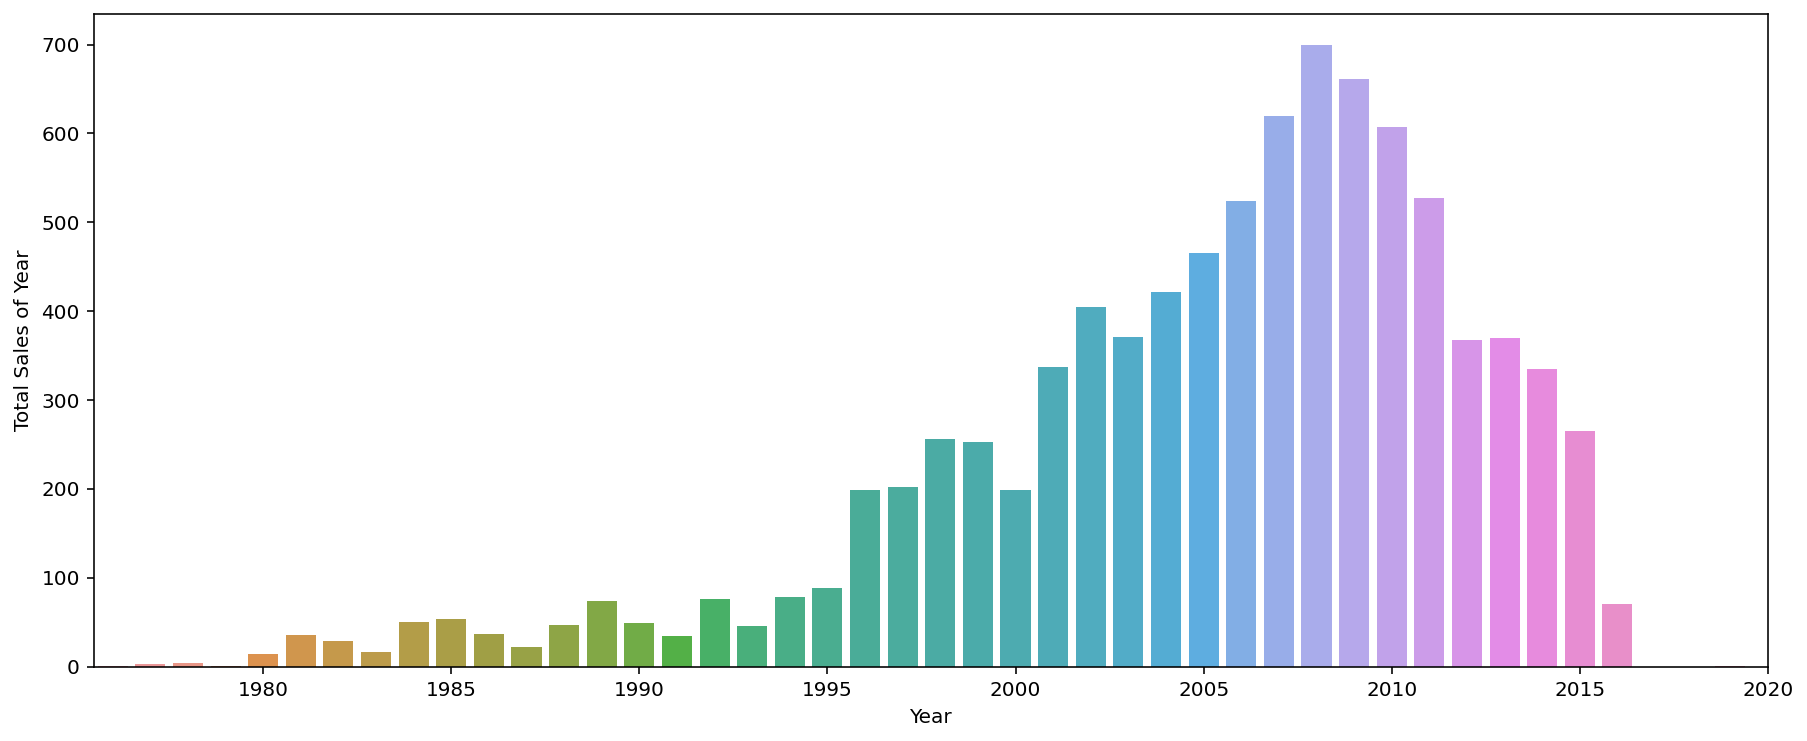

In [34]:
fig = plt.figure(figsize=(15,6))

sns.barplot(x='Year', y='Total_Sales', data=df_sales_per_year)
yticks_label = plt.ylabel("Total Sales of Year")
xticks = plt.xticks([4,9,14,19,24, 29, 34, 39, 44],['1980','1985','1990','1995','2000', '2005', '2010', '2015', '2020'])

*1995년 이전 데이터는 삭제 하기로 함*

*- 데이터 양이 많지 않음*

*- Platform 변화 등*

In [35]:
df_copy = df_copy.drop(df_copy[df_copy.Year <= 1995].index)
df_copy.head()

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009,Action,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,0.12,0.09,0.00,0.04,0.25


In [36]:
# 연도별 Sales
df_sales_per_year = df_copy.groupby('Year').sum().reset_index()

df_sales_per_year.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1996,86.82,47.28,57.44,7.69,199.23
1,1997,95.23,48.58,49.04,9.20,202.05
2,1998,128.16,67.21,50.08,11.09,256.54
3,1999,126.85,63.08,52.63,10.17,252.73
4,2000,93.77,52.45,41.27,11.53,199.02


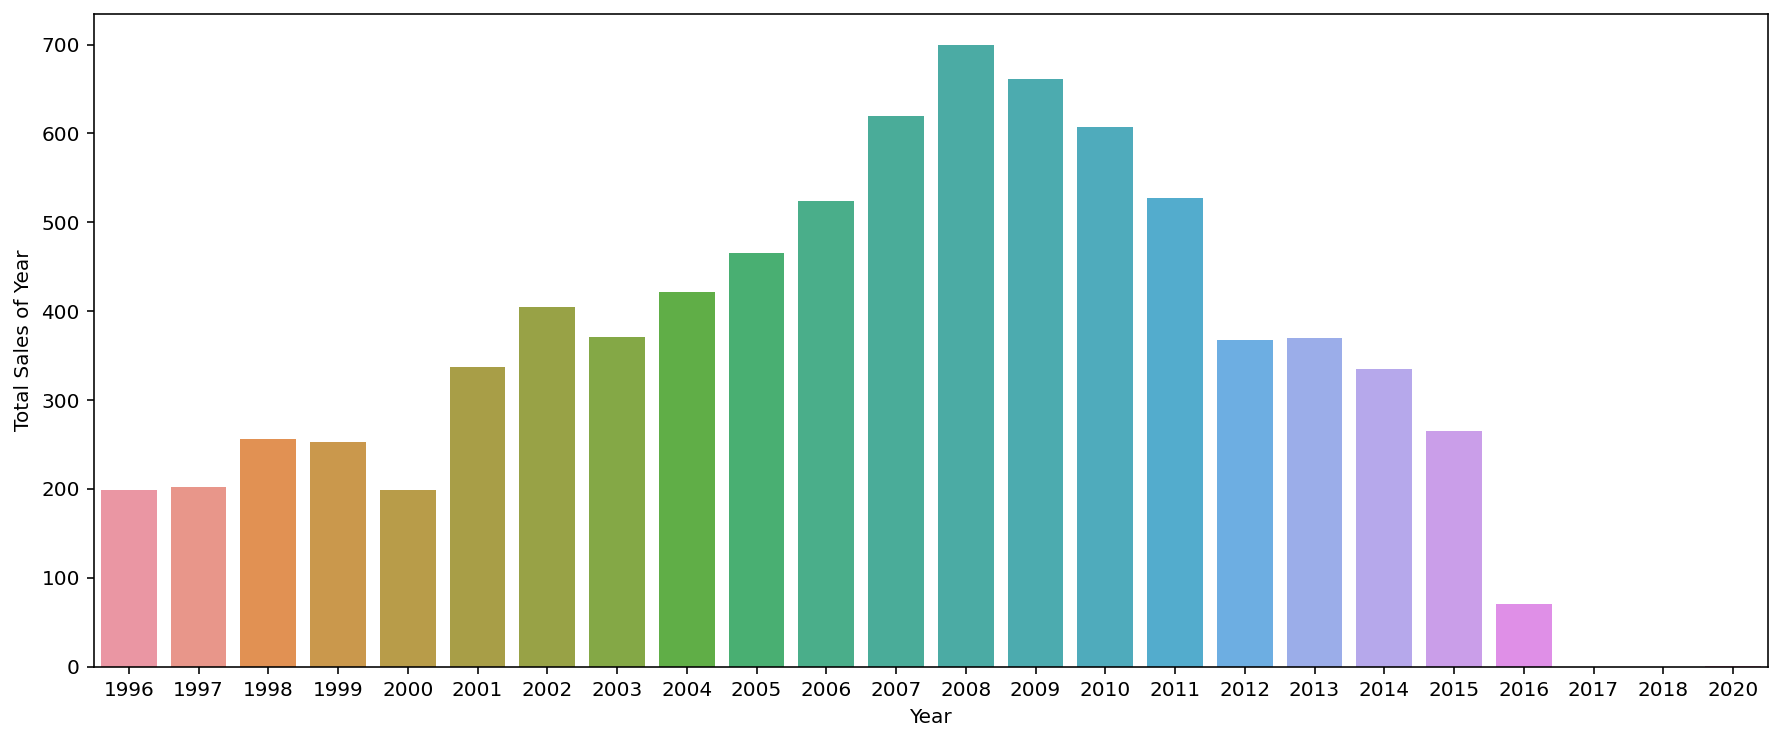

In [37]:
fig = plt.figure(figsize=(15,6))

sns.barplot(x='Year', y='Total_Sales', data=df_sales_per_year)
yticks_label = plt.ylabel("Total Sales of Year")

In [38]:
# Make hue
df_melt_s_p_y = pd.melt(df_sales_per_year, id_vars='Year', var_name='Region', value_name='Sales')
df_melt_s_p_y.head()

,Year,Region,Sales
0,1996,NA_Sales,86.82
1,1997,NA_Sales,95.23
2,1998,NA_Sales,128.16
3,1999,NA_Sales,126.85
4,2000,NA_Sales,93.77


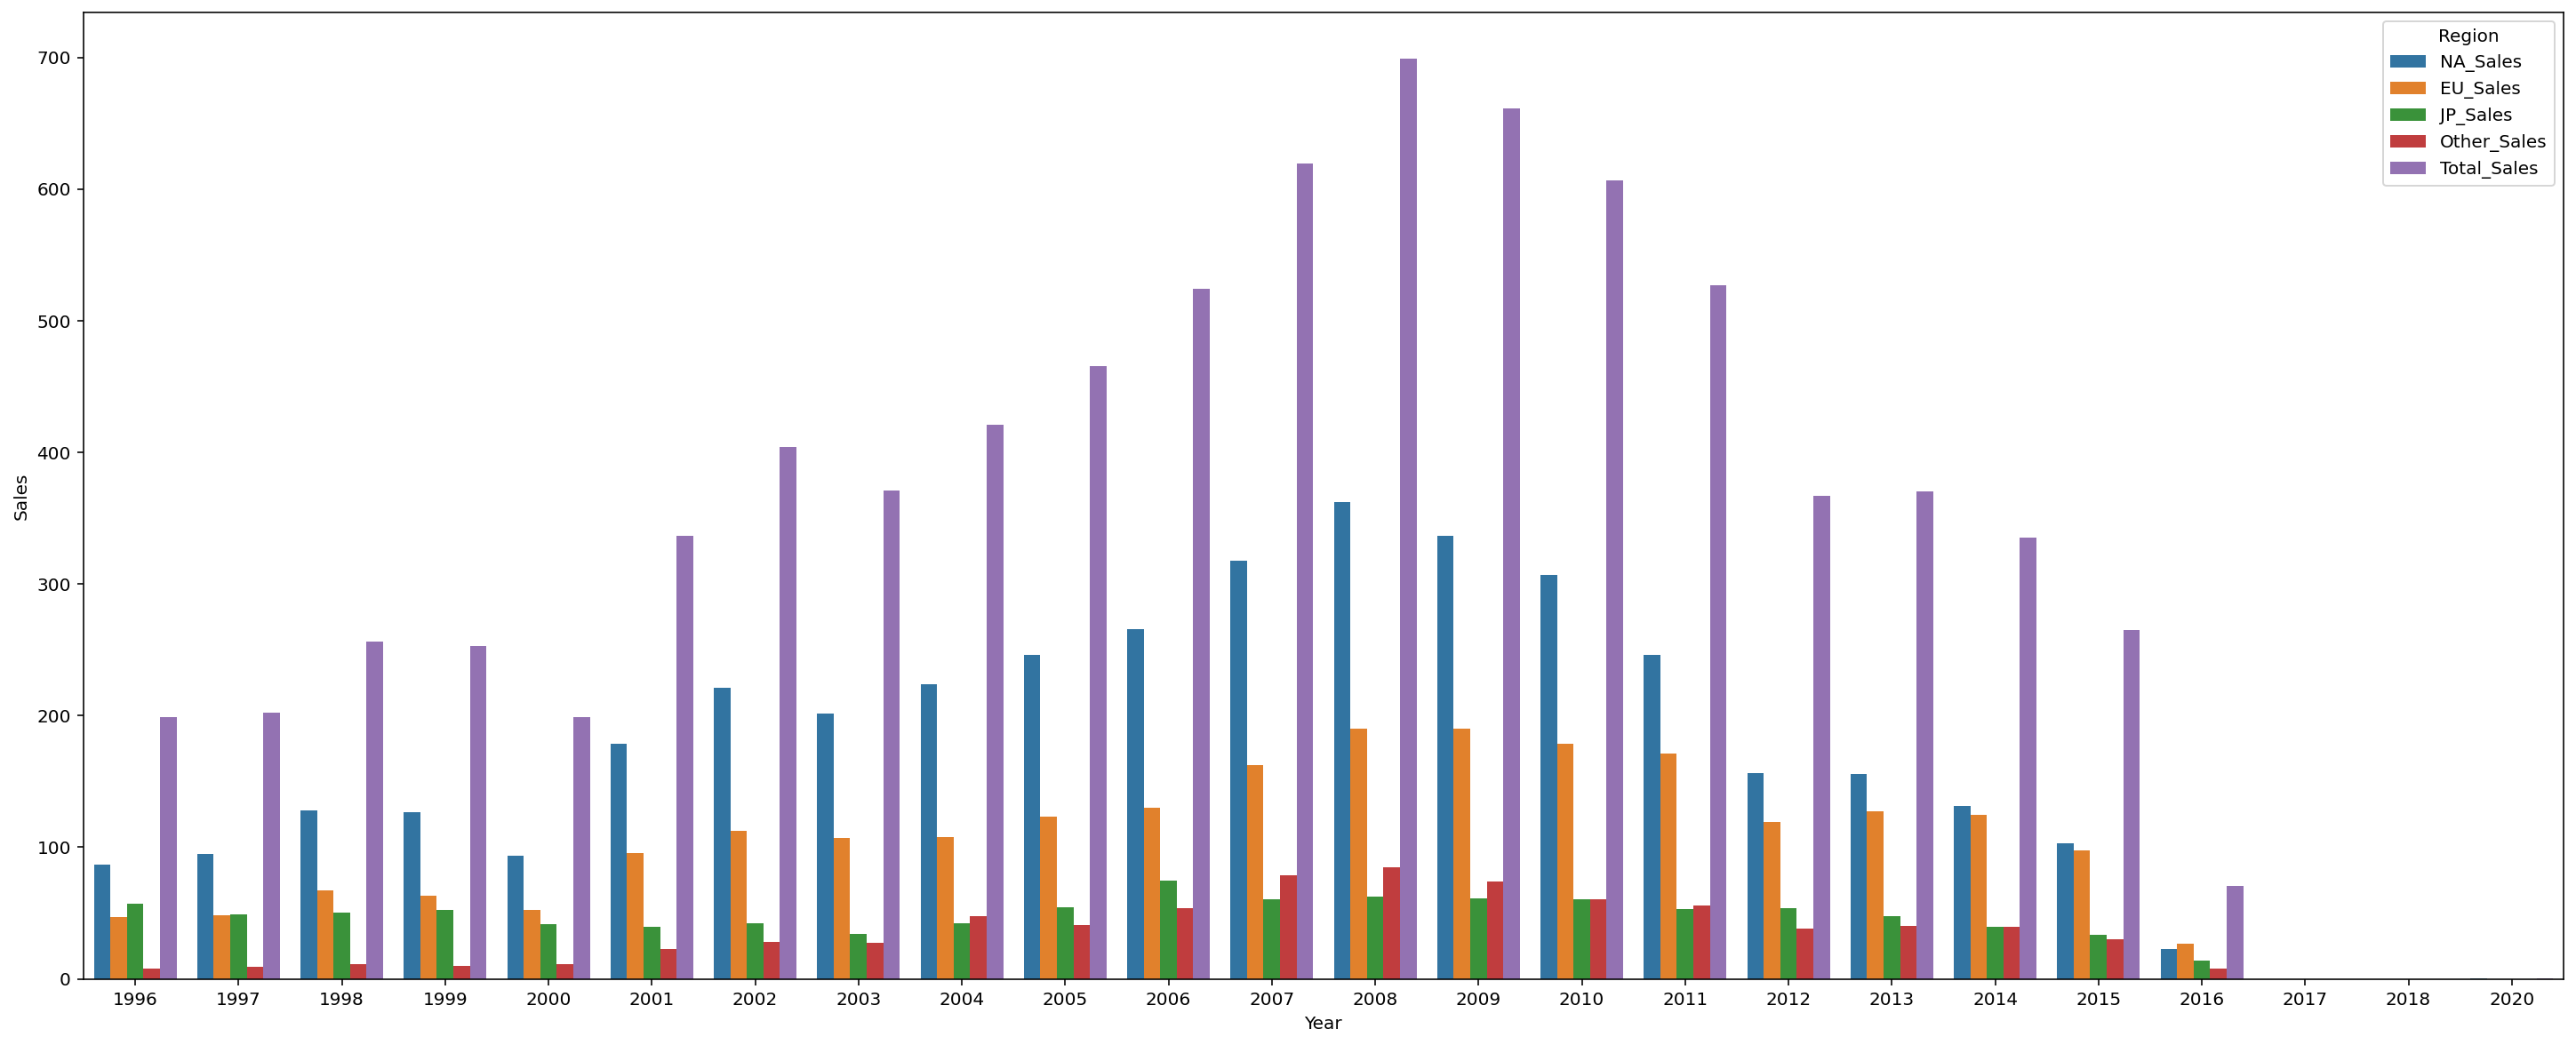

In [39]:
fig = plt.figure(figsize=(25,10))

sns.barplot(x='Year', y='Sales', hue='Region', data=df_melt_s_p_y)

*5. 가설 검정*

*1) 지역에 따라서 선호하는 게임 장르가 다를까라는 질문에 대답을 하셔야 합니다.*

*Genre: Action, Adventure, Misc, Platform, Sports, Simulation*

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*Racing, Role-Playing, Puzle, Strategy, Fighting, Shooter*

*H<sub>0 : 지역에 따라 선호하는 게임 장르가 다르지 않다.*

*H<sub>1 : 지역에 따라 선호하는 게임 장르가 다르다.*

In [40]:
df_NA = df_copy[['Genre', 'NA_Sales']]
df_NA = df_NA.groupby('Genre').sum()
df_NA.reset_index(inplace=True)

In [41]:
df_EU = df_copy[['Genre', 'EU_Sales']]
df_EU = df_EU.groupby('Genre').sum()
df_EU.reset_index(inplace=True)

In [42]:
df_JP = df_copy[['Genre', 'JP_Sales']]
df_JP = df_JP.groupby('Genre').sum()
df_JP.reset_index(inplace=True)

In [43]:
df_Other = df_copy[['Genre', 'Other_Sales']]
df_Other = df_Other.groupby('Genre').sum()
df_Other.reset_index(inplace=True)

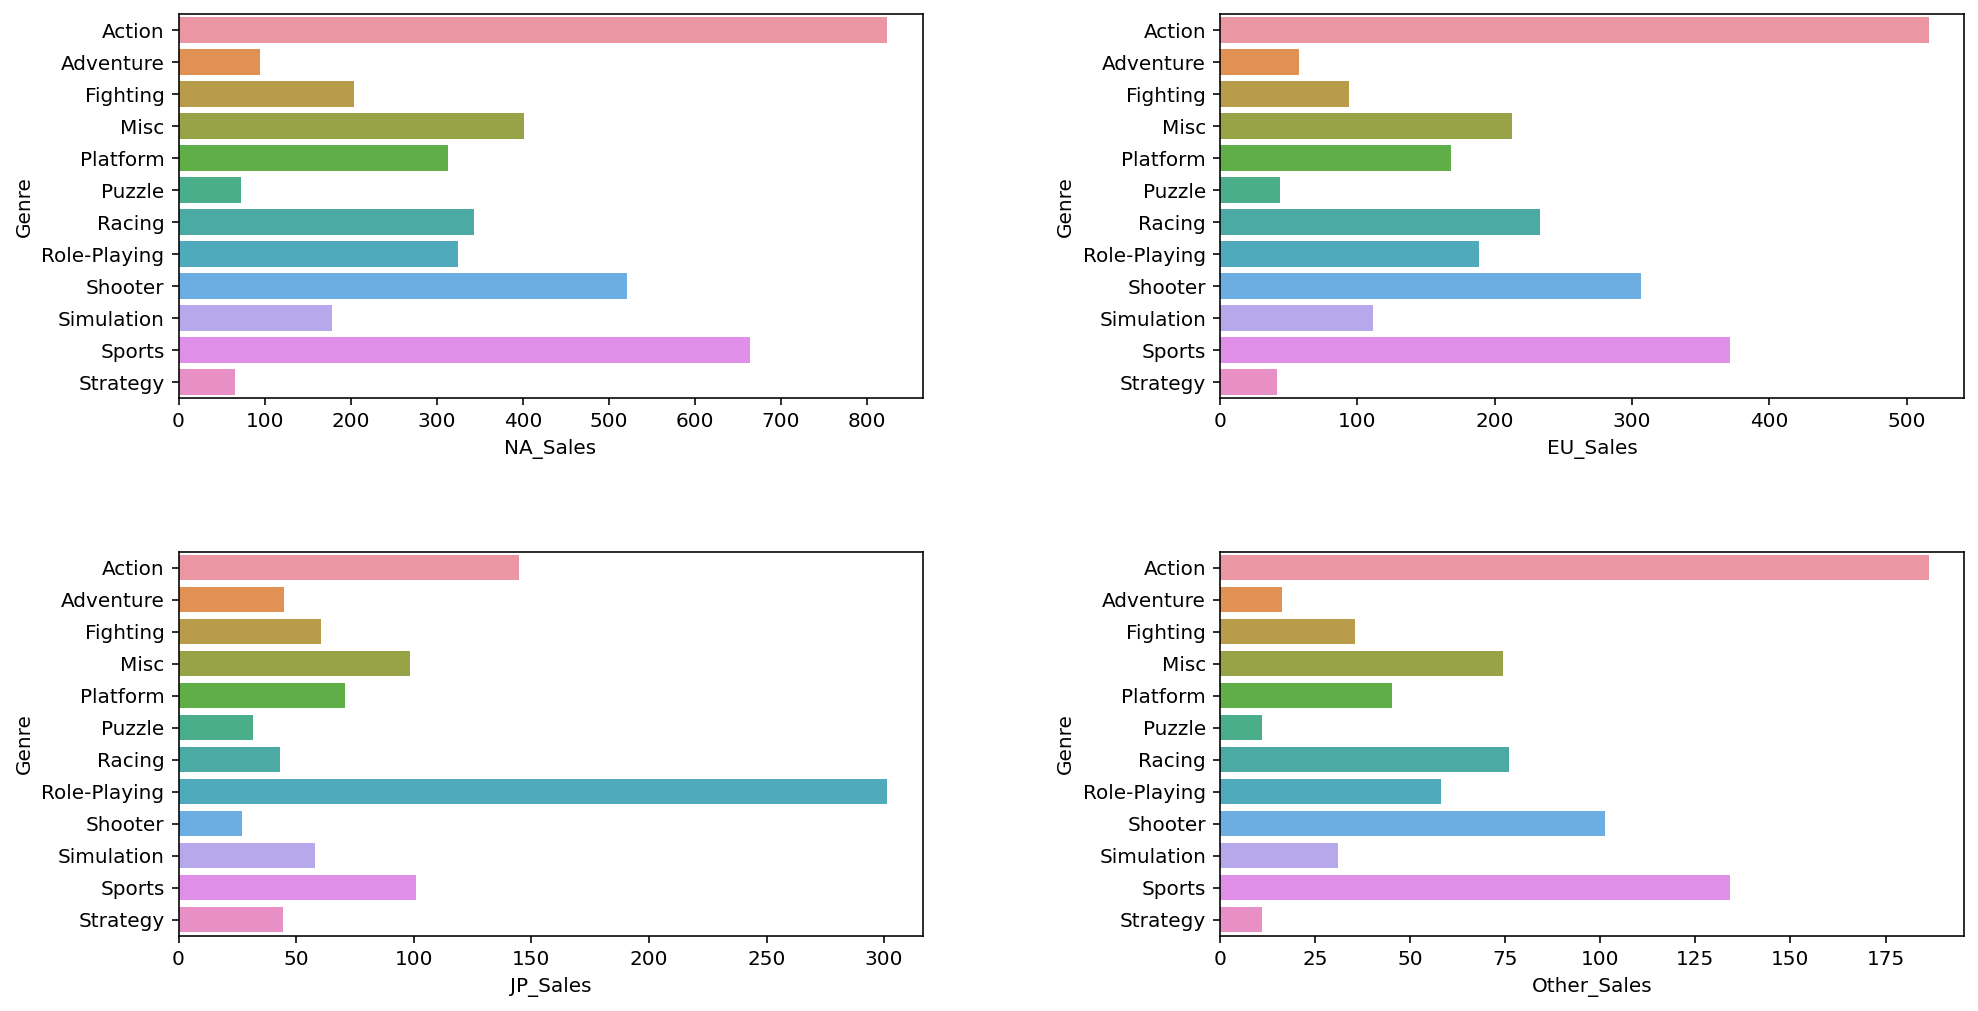

In [44]:
fig, ax = plt.subplots(2, 2, figsize=(16,8))

sns.barplot(x='NA_Sales', y='Genre', data=df_NA, orient='h', ax = ax[0][0])
sns.barplot(x='EU_Sales', y='Genre', data=df_EU, orient='h', ax = ax[0][1])
sns.barplot(x='JP_Sales', y='Genre', data=df_JP, orient='h', ax = ax[1][0])
sns.barplot(x='Other_Sales', y='Genre', data=df_Other, orient='h', ax = ax[1][1])

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.4, hspace=0.4)

In [45]:
df_analysis = pd.concat([df_NA, df_EU.EU_Sales, df_JP.JP_Sales, df_Other.Other_Sales], axis=1)

df_analysis.set_index('Genre', inplace=True)

In [46]:
df_analysis

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,823.23,515.99,144.67,186.36
Adventure,94.91,57.58,44.87,16.38
Fighting,203.51,93.95,60.52,35.40
Misc,401.18,212.70,98.26,74.45
Platform,313.46,168.00,70.59,45.18
Puzzle,72.66,43.50,31.47,11.02
Racing,343.07,232.64,42.96,76.04
Role-Playing,325.08,188.36,301.26,58.06
Shooter,521.24,306.28,26.79,101.27


In [47]:
# 카이제곱 검정
from scipy.stats import chi2_contingency

chi2_val, p, dof, expected = chi2_contingency(df_analysis, correction=False)
if (p < 0.05):
  print('p value:', p,"\n"+'귀무가설을 기각한다. 지역에 따라 선호하는 장르가 다르다.')
else:
  print('p value:', p,"\n"+'귀무가설을 기각하지 못한다. 지역에 따라 선호하는 장르가 같다.')

p value: 3.827931017000438e-109 
귀무가설을 기각한다. 지역에 따라 선호하는 장르가 다르다.


In [48]:
print("dof: " + str(dof))

dof: 33


*2) 연도별 게임의 트랜드가 있을까라는 질문에 대답을 하셔야 합니다.*

*Genre: Action, Adventure, Misc, Platform, Sports, Simulation*

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*Racing, Role-Playing, Puzle, Strategy, Fighting, Shooter*

*년도별 총 출고량이 많은 Genre 파악하여 판단*

In [49]:
df_year_genre = df_copy.groupby(['Year', 'Genre'])['Total_Sales'].sum().reset_index()

In [50]:
cond = df_year_genre.groupby('Year')['Total_Sales'].transform(max) == df_year_genre['Total_Sales']
df_year_max_genre = df_year_genre[cond].reset_index(drop=True)
df_year_max_genre.head(12)

,Year,Genre,Total_Sales
0,1996,Role-Playing,43.99
1,1997,Racing,31.92
2,1998,Sports,43.21
3,1999,Role-Playing,49.79
4,2000,Sports,37.75
5,2001,Action,59.56
6,2002,Action,89.16
7,2003,Action,67.90
8,2004,Action,76.50
9,2005,Action,86.57


In [51]:
df_year_max_genre.tail(12)

,Year,Genre,Total_Sales
12,2008,Action,145.65
13,2009,Action,139.51
14,2010,Action,118.67
15,2011,Action,126.16
16,2012,Action,121.66
17,2013,Action,127.86
18,2014,Action,96.99
19,2015,Action,68.72
20,2016,Action,19.85
21,2017,Role-Playing,0.04


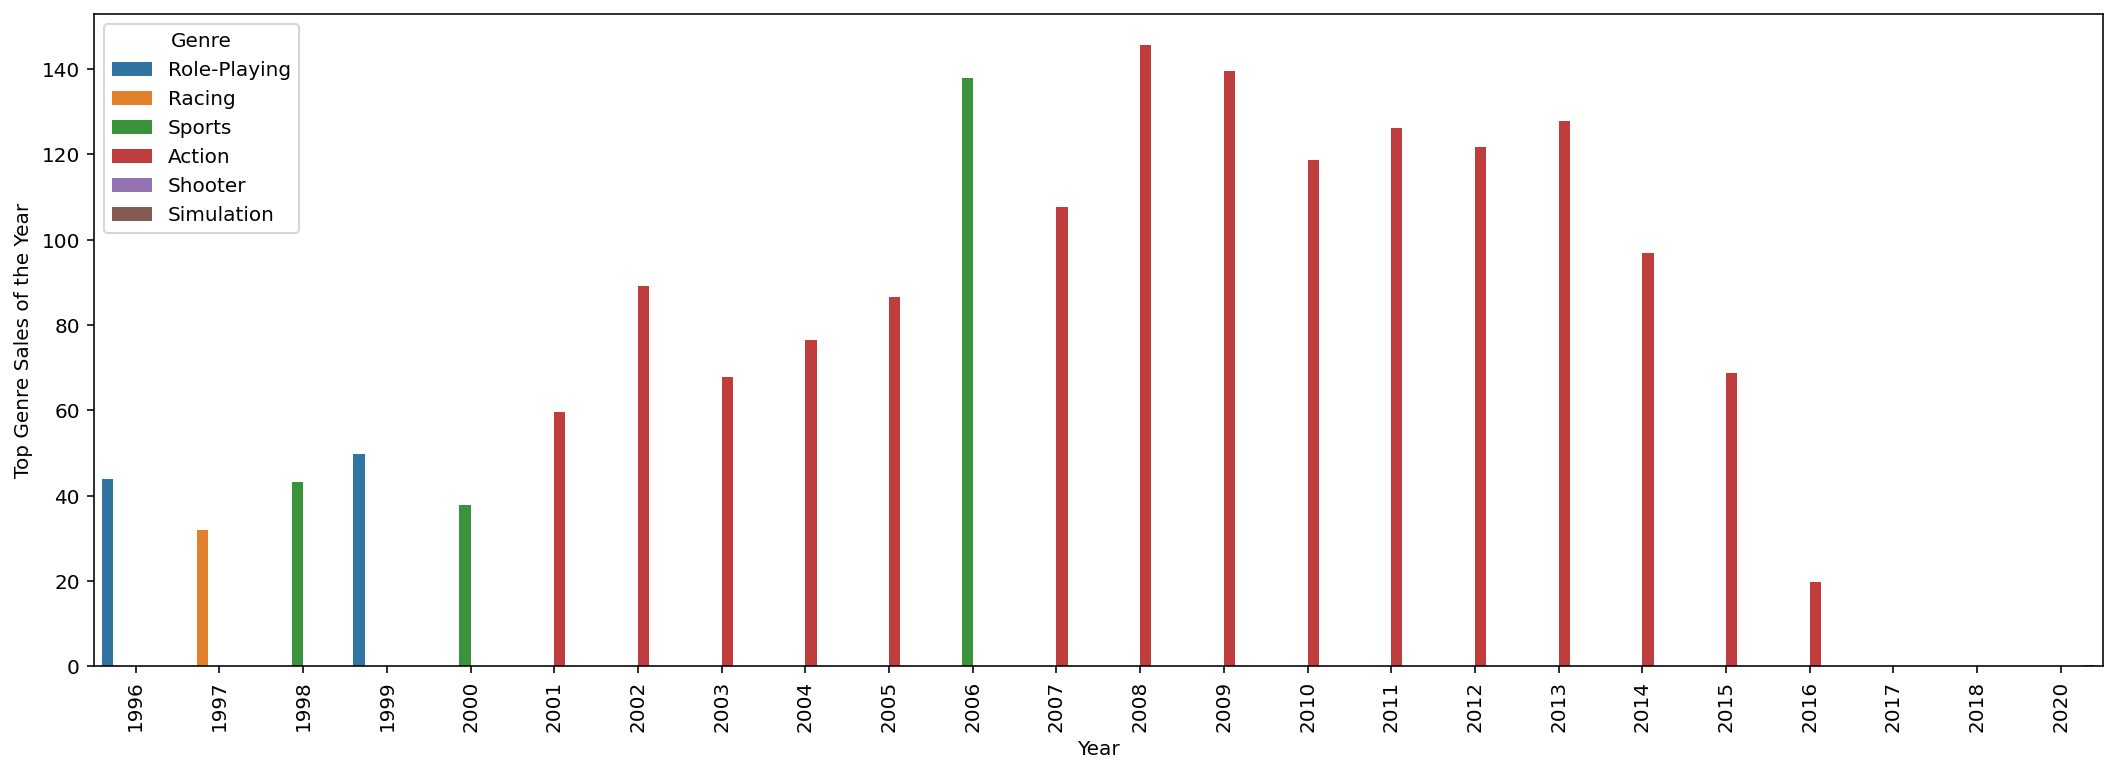

In [52]:
fig = plt.figure(figsize=(18,6))

sns.barplot(x='Year', y='Total_Sales', hue='Genre', data=df_year_max_genre)
yticks_label = plt.ylabel("Top Genre Sales of the Year")
xticks = plt.xticks(rotation = 90)

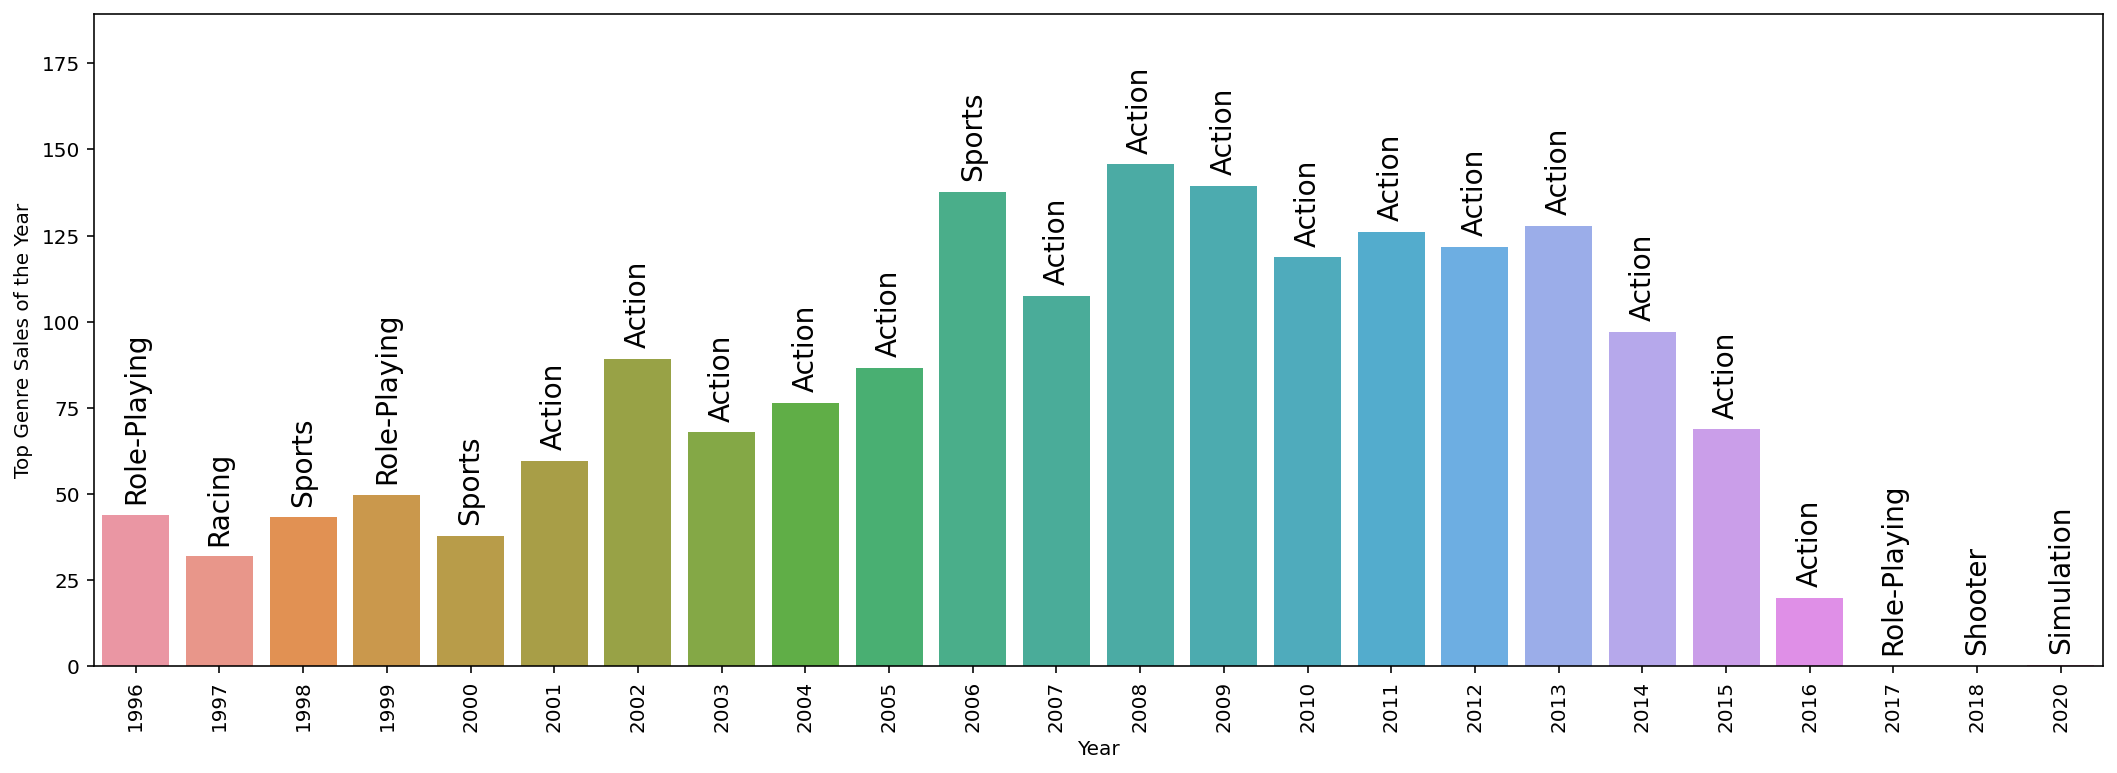

In [53]:
# fig = plt.figure(figsize=(18,6))
fig, ax = plt.subplots(1,1, figsize=(18,6))
ax.margins(x=0.0, y=0.3)

g = sns.barplot(x='Year', y='Total_Sales', data=df_year_max_genre)

genre = df_year_max_genre['Genre'].values
cnt = 0
for value in df_year_max_genre['Total_Sales']:
    g.text(x=cnt, y=value + 5, s=str(genre[cnt]),
            color='black', size=14, rotation=90, ha='center')
    cnt+=1

yticks_label = plt.ylabel("Top Genre Sales of the Year")
xticks = plt.xticks(rotation = 90)



*3) 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.*


*2010 이후의 게임 중에서 출고량 순으로 정리하여 판단*

In [54]:
df_top_200_sales = df_copy[df_copy.Year >= 2010].sort_values(by='Total_Sales', ascending=False).head(200).reset_index(drop=True)
df_top_200_sales

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Kinect Adventures!,X360,2010,Misc,14.97,4.94,0.24,1.67,21.82
1,Grand Theft Auto V,PS3,2013,Action,7.01,9.27,0.97,4.14,21.39
2,Grand Theft Auto V,X360,2013,Action,9.63,5.31,0.06,1.38,16.38
3,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.57,3.28,5.65,0.82,15.32
4,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.03,4.28,0.13,1.32,14.76
...,...,...,...,...,...,...,...,...,...
195,Kinect: Disneyland Adventures,X360,2011,Misc,1.73,0.46,0.02,0.18,2.39
196,Dead Island,X360,2011,Action,1.48,0.71,0.00,0.20,2.39
197,Need for Speed (2015),PS4,2015,Racing,0.49,1.49,0.05,0.36,2.39
198,Batman: Arkham Origins,PS3,2013,Action,1.07,0.87,0.04,0.40,2.38


In [55]:
df_top_200_sales_genre = df_top_200_sales.groupby(['Genre'])['Total_Sales'].sum().reset_index()

df_top_200_sales_genre = df_top_200_sales_genre.sort_values('Total_Sales', ascending=False).reset_index(drop=True)

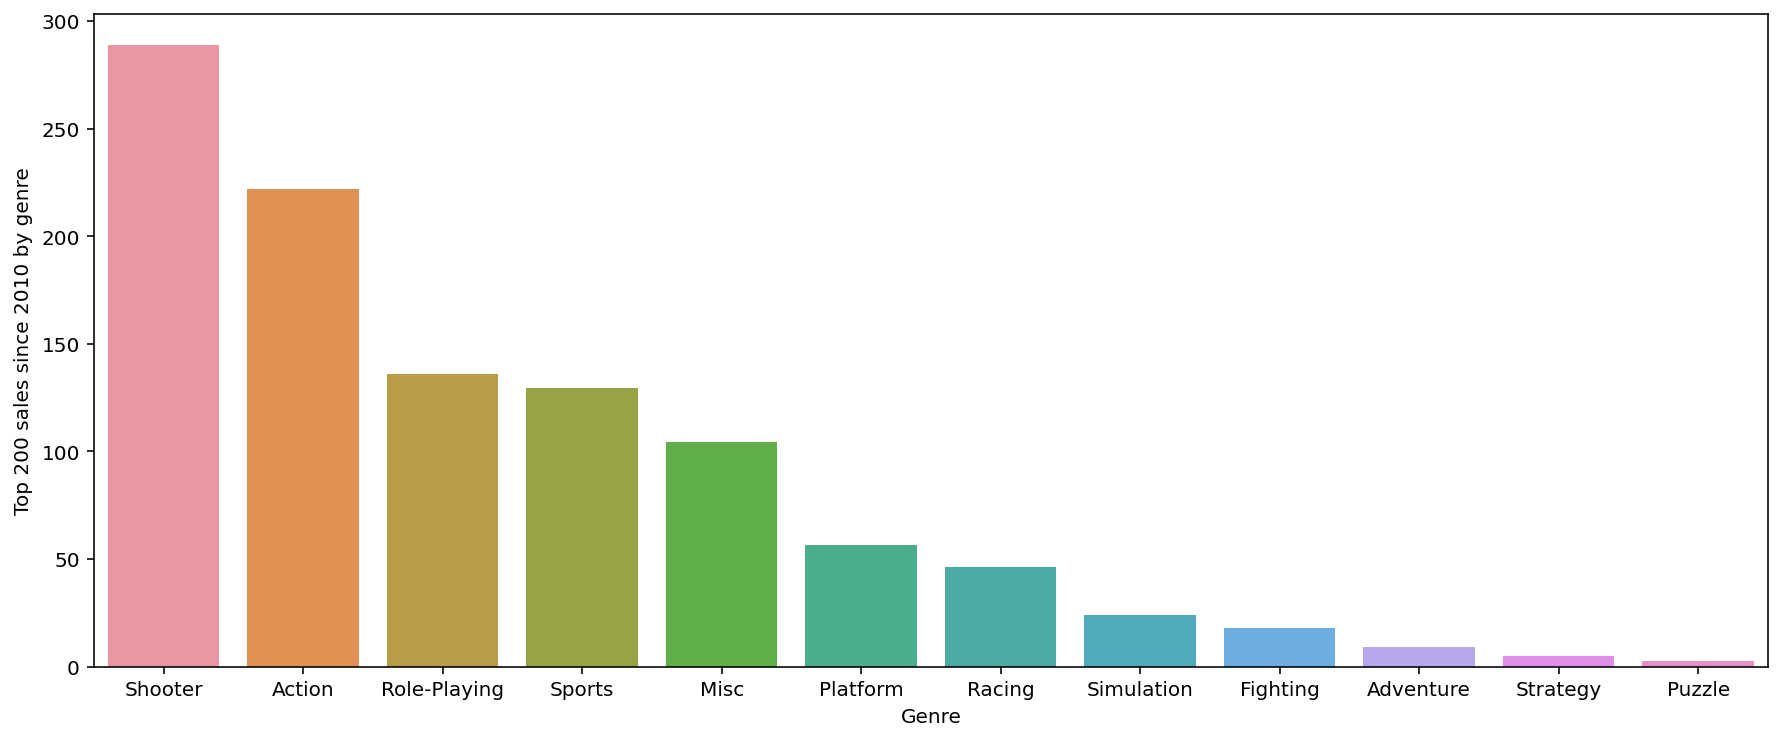

In [56]:
fig = plt.figure(figsize=(15,6))

sns.barplot(x='Genre', y='Total_Sales', data=df_top_200_sales_genre)
yticks_label = plt.ylabel("Top 200 sales since 2010 by genre")

In [57]:
df_top_200_sales_platform = df_top_200_sales.groupby(['Platform'])['Total_Sales'].sum().reset_index()
df_top_200_sales_platform = df_top_200_sales_platform.sort_values('Total_Sales', ascending=False).reset_index(drop=True)

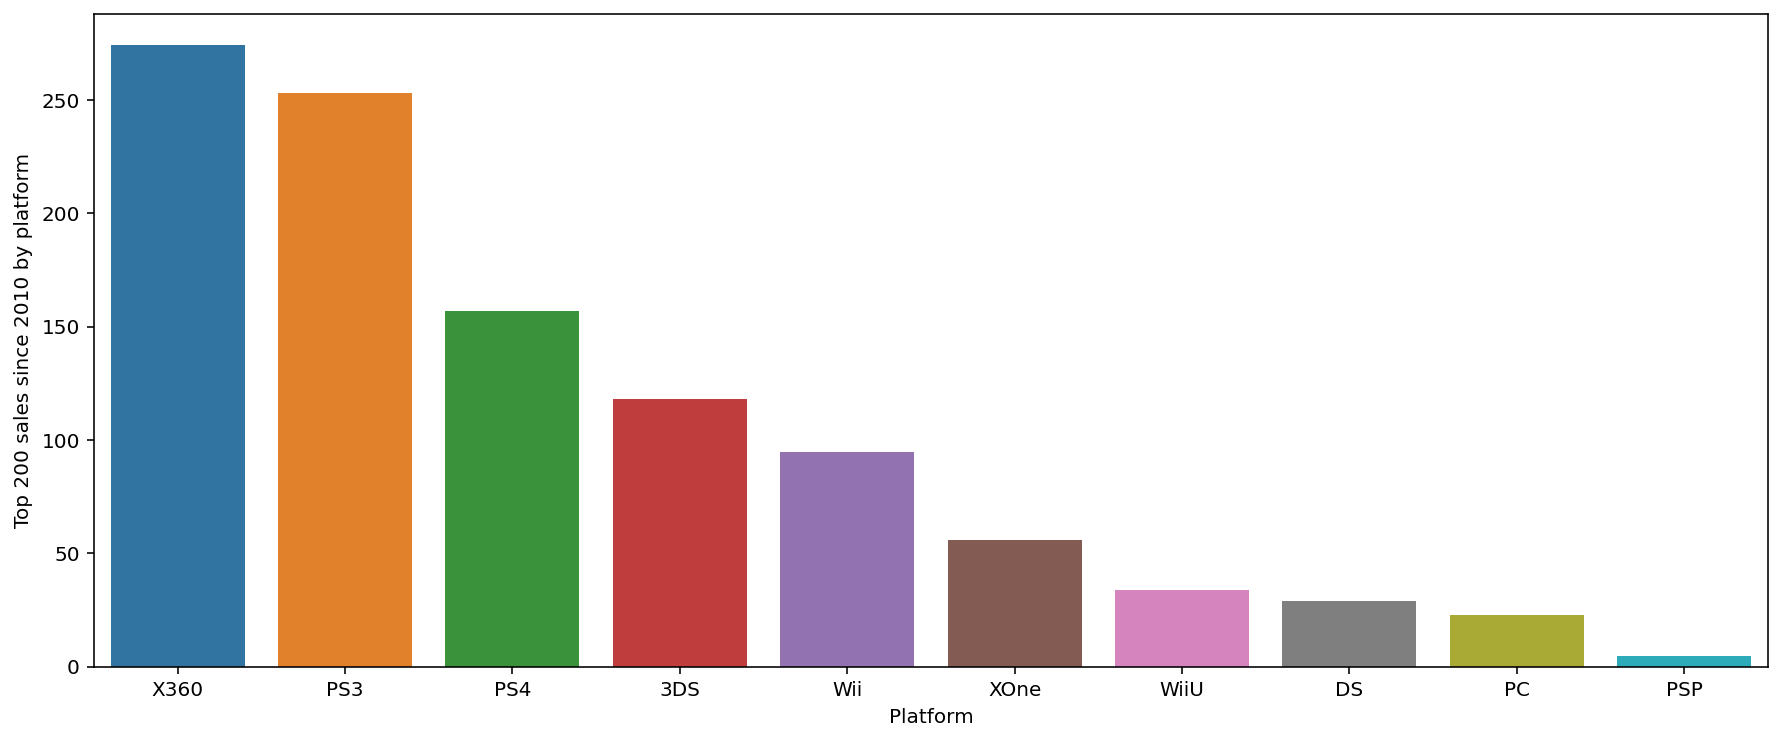

In [58]:
fig = plt.figure(figsize=(15,6))

sns.barplot(x='Platform', y='Total_Sales', data=df_top_200_sales_platform)

yticks_label = plt.ylabel("Top 200 sales since 2010 by platform")

*2010년 이후의 매출 200위의 게임 분석 결과*

*Genre는 'Shooter', 'Action', Role-Playing', 'Sports' 순이며,*

*Platform은 'X360', 'PS3', 'PS4', '3DS', 'Wii' 순으로 나타났다.*

*다음 분기 어떤 게임을 개발해야 할까?*

*상위 두 개의 장르(Shooter, Action)에 대하여 Platform별, 지역별 판매량을 분석하여 결정*

In [59]:
# 2010년 이후의 Shooter Genre 데이터

cond = (df_copy.Genre == 'Shooter') & (df_copy.Year >= 2010)
df_shooter = df_copy[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']][cond].reset_index(drop = True)

In [60]:
# Shooter Genre의 Platform 별 판매량

df_shooter_platform = df_shooter.groupby(['Platform'])['Total_Sales'].sum().reset_index()
df_shooter_platform = df_shooter_platform.sort_values('Total_Sales', ascending=False).reset_index(drop=True)
df_shooter_platform

,Platform,Total_Sales
0,X360,161.47
1,PS3,131.59
2,PS4,75.32
3,XOne,51.59
4,PC,26.27
5,WiiU,6.16
6,Wii,4.61
7,PSV,4.59
8,DS,1.42
9,3DS,1.30


In [61]:
# 2010년 이후의 Action Genre 데이터

cond = (df_copy.Genre == 'Action') & (df_copy.Year >= 2010)
df_action = df_copy[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']][cond].reset_index(drop = True)

In [62]:
# Action Genre의 Platform 별 판매량

df_action_platform = df_action.groupby(['Platform'])['Total_Sales'].sum().reset_index()
df_action_platform = df_action_platform.sort_values('Total_Sales', ascending=False).reset_index(drop=True)
df_action_platform

,Platform,Total_Sales
0,PS3,206.62
1,X360,147.70
2,PS4,84.70
3,3DS,56.91
4,Wii,46.57
5,XOne,33.78
6,DS,24.92
7,PC,22.24
8,PSV,19.99
9,WiiU,19.31


*Shooter, Action에 대하여 공통으로 상위 3에 해당하는 'PS3', 'X360', 'PS4'에 대하여 지역별 판매량 파악*

In [63]:
# Shooter Genre의 상위 3개 Platform의 Region 별 판매량

df_shooter_x360 = df_shooter[df_shooter.Platform == 'X360'][df_shooter.columns.difference(['Platform'])].sum().reset_index()
df_shooter_x360 = df_shooter_x360.reset_index(drop=True)

df_shooter_ps3 = df_shooter[df_shooter.Platform == 'PS3'][df_shooter.columns.difference(['Platform'])].sum().reset_index()
df_shooter_ps3 = df_shooter_ps3.reset_index(drop=True)

df_shooter_ps4 = df_shooter[df_shooter.Platform == 'PS4'][df_shooter.columns.difference(['Platform'])].sum().reset_index()
df_shooter_ps4 = df_shooter_ps4.reset_index(drop=True)

In [64]:
df_shooter_x360.rename(columns={'index':'Region', 0:'X360'}, inplace=True)
df_shooter_ps3.rename(columns={'index':'Region', 0:'PS3'}, inplace=True)
df_shooter_ps4.rename(columns={'index':'Region', 0:'PS4'}, inplace=True)

df_shooter_concat = pd.concat([df_shooter_x360, df_shooter_ps3.PS3, df_shooter_ps4.PS4], axis=1)

In [65]:
# Make hue
df_melt_shooter = pd.melt(df_shooter_concat, id_vars='Region', var_name='Platform', value_name='Sales')

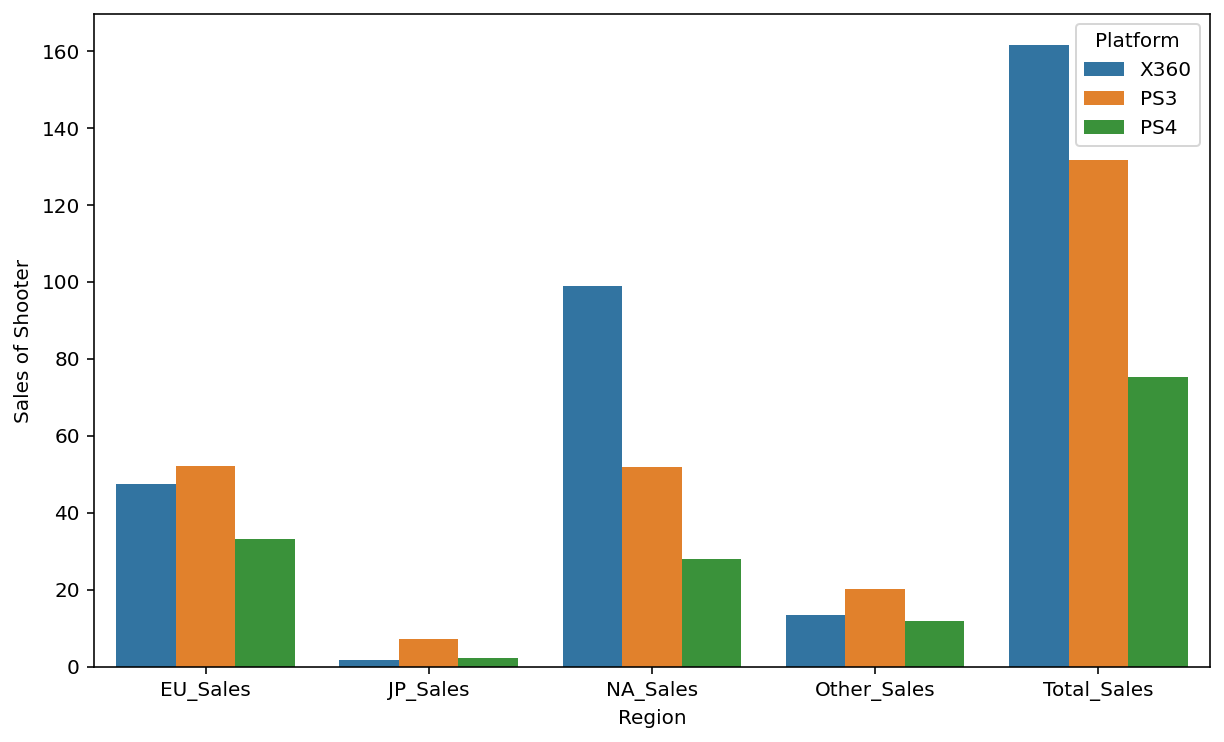

In [66]:
fig = plt.figure(figsize=(10,6))

sns.barplot(x='Region', y='Sales', hue='Platform', data=df_melt_shooter)

yticks_label = plt.ylabel("Sales of Shooter")

In [67]:
# Action Genre의 상위 3개 Platform의 Region 별 판매량

df_action_x360 = df_action[df_action.Platform == 'X360'][df_action.columns.difference(['Platform'])].sum().reset_index()
df_action_x360 = df_action_x360.reset_index(drop=True)

df_action_ps3 = df_action[df_action.Platform == 'PS3'][df_action.columns.difference(['Platform'])].sum().reset_index()
df_action_ps3 = df_action_ps3.reset_index(drop=True)

df_action_ps4 = df_action[df_action.Platform == 'PS4'][df_action.columns.difference(['Platform'])].sum().reset_index()
df_action_ps4 = df_action_ps4.reset_index(drop=True)

In [68]:
df_action_x360.rename(columns={'index':'Region', 0:'X360'}, inplace=True)
df_action_ps3.rename(columns={'index':'Region', 0:'PS3'}, inplace=True)
df_action_ps4.rename(columns={'index':'Region', 0:'PS4'}, inplace=True)

df_action_concat = pd.concat([df_action_x360, df_action_ps3.PS3, df_action_ps4.PS4], axis=1)

In [69]:
# Make hue
df_melt_action = pd.melt(df_action_concat, id_vars='Region', var_name='Platform', value_name='Sales')

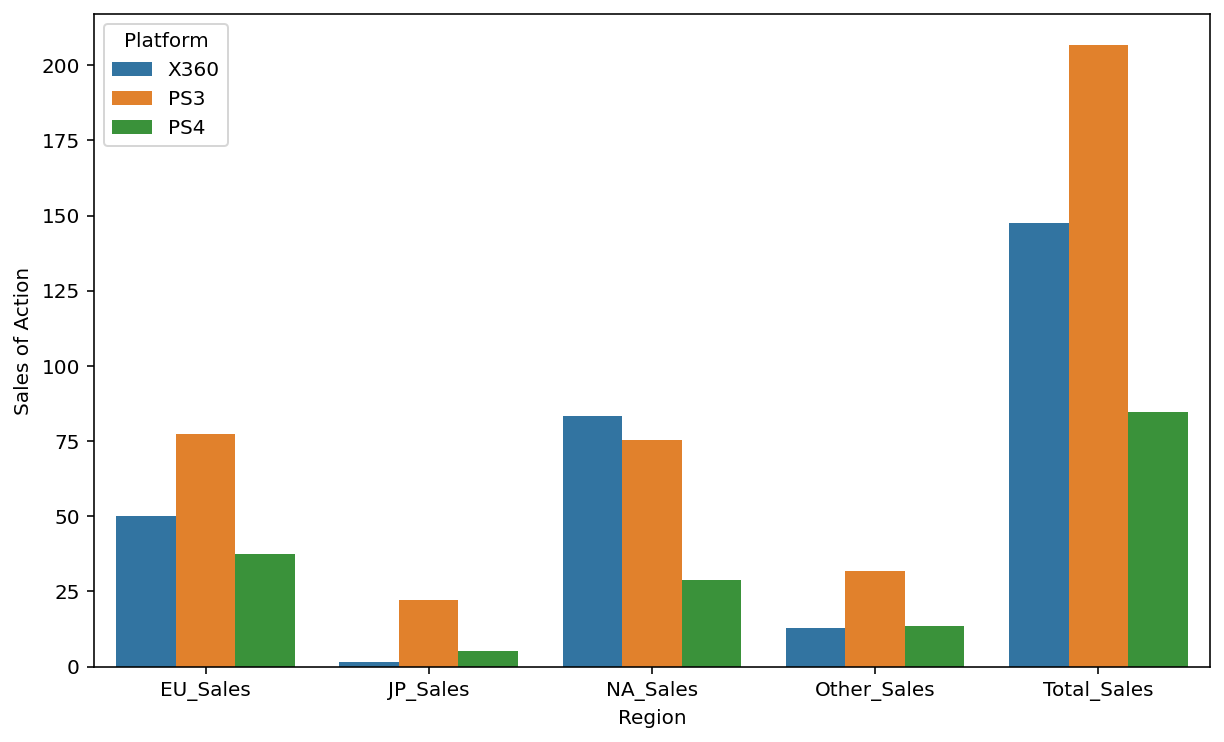

In [70]:
fig = plt.figure(figsize=(10,6))

sns.barplot(x='Region', y='Sales', hue='Platform', data=df_melt_action)

yticks_label = plt.ylabel("Sales of Action")

*결론*

*판매량이 가장 많은 Shooter, Action Genre에 집중*

*두 장르 공통으로 X360, PS3, PS4 등 다양한 Platform에 적용을 해야 함*

*지역적으로는 판매량이 가장 많은 NA와 EU를 먼저 공략하는 것이 좋을 듯 함*

<br>

*점점 Mobile 게임 시장이 커지고 있으므로, 추후 Mobile 게임에 대한 분석도 필요*